In [ ]:
import mysql.connector
import missingno as msno
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [ ]:
customers = pd.read_csv('../kaggle/Finalproject_dataset/olist_customers_dataset.csv')
geolocation = pd.read_csv('../kaggle/Finalproject_dataset/olist_geolocation_dataset.csv')
orders = pd.read_csv('../kaggle/Finalproject_dataset/olist_orders_dataset.csv')
order_items = pd.read_csv('../kaggle/Finalproject_dataset/olist_order_items_dataset.csv')
order_payments = pd.read_csv('../kaggle/Finalproject_dataset/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('../kaggle/Finalproject_dataset/olist_order_reviews_dataset.csv')
products = pd.read_csv('../kaggle/Finalproject_dataset/olist_products_dataset.csv')
sellers = pd.read_csv('../kaggle/Finalproject_dataset/olist_sellers_dataset.csv')
product_cat_name = pd.read_csv('../kaggle/Finalproject_dataset/product_category_name_translation.csv')

- sellers 데이터 내 seller_zip_code_prefix와 customers 데이터 내 customer_zip_code_prefix는 서로 서로 다른 컬럼이므로 각각의 lat, lng 가 필요함
- 또한 geolocation 데이터 내에는 중복된 zip_code_prefix와 geolocation_state가 존재하므로 평균값으로 lat, lng 대치
- 따라서, geolocation 데이터 내에 해당되는 각 zip_code_prefix를 이용해 sellers와 customer의 새로운 lat, lng 컬럼 생성할 것

In [ ]:
geolocation = geolocation.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'})
sellers = sellers.rename(columns={'seller_zip_code_prefix':'zip_code_prefix'})
customers = customers.rename(columns={'customer_zip_code_prefix':'zip_code_prefix'})

# lat, lng 평균값 적용
geolocation2 = geolocation.pivot_table(index='zip_code_prefix', values=['geolocation_lat','geolocation_lng'], aggfunc='mean').reset_index()

# sellers와 geolocation 데이터 셋 merge 수행
sellers_geo = pd.merge(sellers, geolocation2, on='zip_code_prefix', how='inner')
sellers_geo = sellers_geo.rename(columns={'zip_code_prefix':'seller_zip_code_prefix', 'geolocation_lat':'seller_geolocation_lat', 'geolocation_lng':'seller_geolocation_lng'})

# customers와 geolocation 데이터 셋 merge 수행
customers_geo = pd.merge(customers, geolocation2, on='zip_code_prefix', how='inner')
customers_geo = customers_geo.rename(columns={'zip_code_prefix':'customer_zip_code_prefix', 'geolocation_lat':'customer_geolocation_lat', 'geolocation_lng':'customer_geolocation_lng'})

# 전체 데이터 합치기
df1 = reduce(lambda x,y: pd.merge(x,y, on='order_id', how='inner'), [order_items, orders, order_payments, order_reviews])
df2 = reduce(lambda x,y: pd.merge(x,y, on='customer_id', how='inner'), [df1, customers_geo])
df3 = reduce(lambda x,y: pd.merge(x,y, on='product_id', how='inner'), [df2, products])
df4 = reduce(lambda x,y: pd.merge(x,y, on='seller_id', how='inner'), [df3, sellers_geo])
df5 = reduce(lambda x,y: pd.merge(x,y, on='product_category_name', how='inner'), [df4, product_cat_name])

df5.info() # olist_total.csv

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115037 entries, 0 to 115036
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115037 non-null  object 
 1   order_item_id                  115037 non-null  int64  
 2   product_id                     115037 non-null  object 
 3   seller_id                      115037 non-null  object 
 4   shipping_limit_date            115037 non-null  object 
 5   price                          115037 non-null  float64
 6   freight_value                  115037 non-null  float64
 7   customer_id                    115037 non-null  object 
 8   order_status                   115037 non-null  object 
 9   order_purchase_timestamp       115037 non-null  object 
 10  order_approved_at              115023 non-null  object 
 11  order_delivered_carrier_date   113852 non-null  object 
 12  order_delivered_customer_date 

In [ ]:
df = pd.read_csv('../datas/olist_total.csv', encoding='utf-8')
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115032,2c12150c742ae2fa48bc703964c16c5f,1,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,...,1000.0,25.0,25.0,25.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship
115033,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,500.0,16.0,6.0,16.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship
115034,2ef4a11b6e24fdfbb43b92cb5f95edff,2,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,39.90,12.87,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,500.0,21.0,7.0,14.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship
115035,9f7ba492c273ffac8f90a623b8eadd3b,1,5aa0d6ed4e6c0995d62090cd82cde89a,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-28 03:24:24,11.90,12.79,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,...,200.0,16.0,6.0,16.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship


In [ ]:
df.dtypes

order_id                          object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
customer_unique_

In [ ]:
df.isnull().sum()

order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1185
order_delivered_customer_date      2384
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             101302
review_comment_message            66357
review_creation_date                  0
review_answer_timestamp               0
customer_unique_id                    0


In [ ]:
# 숫자형 변수만 기술통계량을 보여준다.
df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,customer_geolocation_lat,customer_geolocation_lng,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_geolocation_lat,seller_geolocation_lng
count,115037.000000,115037.000000,115037.000000,115037.000000,115037.000000,115037.000000,115037.000000,115037.000000,115037.000000,115037.000000,115037.000000,115037.000000,115037.000000,115036.000000,115036.000000,115036.000000,115036.000000,115037.000000,115037.000000,115037.000000
mean,1.194685,120.650015,20.049325,1.094057,2.944566,172.409294,4.034319,34983.378296,-21.233273,-46.196405,48.754288,785.867573,2.200318,2112.365746,30.300897,16.658716,23.104089,24523.886054,-22.793209,-47.247450
std,0.686686,182.853114,15.850423,0.731544,2.780108,266.204508,1.385651,29829.438971,5.565003,4.043501,10.038336,653.051492,1.713213,3776.693083,16.203684,13.484108,11.730325,27644.643367,2.697029,2.344988
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,1003.000000,-33.689948,-72.668881,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,-32.079231,-67.813284
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,11095.000000,-23.590078,-48.104959,42.000000,345.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,-23.607718,-48.829744
50%,1.000000,74.900000,16.320000,1.000000,2.000000,108.000000,5.000000,24230.000000,-22.928999,-46.631777,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13720.000000,-23.424944,-46.755753
75%,1.000000,134.900000,21.200000,1.000000,4.000000,189.430000,5.000000,58297.000000,-20.182732,-43.624737,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28470.000000,-21.757321,-46.522287
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,99980.000000,42.184003,-8.723762,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,-2.501242,-34.855616


# 1. 데이터셋 설명

### 고객 정보 데이터(olist_customers_dataset)
 - customer_id(varchar) : 주문 건마다 생성
 - customer_unique_id(varchar) : 고객 고유 아이디
 - customer_zip_code_prefix(int) : 고객 집코드
 - customer_city(varchar) : 고객 도시
 - customer_state(varchar) : 고객 주

### 지역 위치정보 데이터(olist_geolocation_dataset)
 - geolocation_zip_code_prefix(int) : 위치정보 집코드
 - geolocation_lat(double) : 위도
 - geolocation_lng(double) : 경도
 - geolocation_city(varchar) : 도시
 - geolocation_state(varchar) : 주

### 주문 품목 데이터(olist_order_items_dataset)
 - order_id(varchar) : 주문id
 - order_item_id(int) : 주문 갯수
 - product_id(varchar) : 프로덕트 id
 - seller_id(varchar) : 판매자 id
 - shipping_limit_date(varchar) : 선적 마감일
 - price(double) : 가격
 - freight_value(double) : 화물 요금

### 주문 결재 데이터(olist_order_payments_dataset)
 - order_id(varchar) : 오더 id
 - payment_sequential(int) : 결재 갯수
 - payment_type(varchar) : 결재 방식
 - payment_installments(int) : 할부 개월수
 - payment_value(double) : 지불액

### 오더 리뷰 데이터(olist_order_reviews_dataset)
 - review_id(varchar) : 리뷰id
 - order_id(varchar) : 주문id
 - review_score(int) : 리뷰 평점
 - review_comment_title(varchar) : 리뷰 코멘트 제목
 - review_comment_message(varchar) : 리뷰 코멘트 내용
 - review_creation_date(varchar) : 리뷰 생성일시
 - review_answer_timestamp(varchar) : 리뷰 답변 시간

### 주문 데이터셋(olist_orders_dataset)
 - order_id(varchar) : 주문id
 - customer_id(varchar) : 고객id
 - order_status(varchar) : 배송 단계
 - order_purchase_timestamp(varchar) : 구매요청 시간
 - order_approved_at(varchar) : 구매요청 후 결재 승인 시간
 - order_delivered_carrier_date(varchar) : 배송 회사에서 배송 처리 시작 시간
 - order_delivered_customer_date(varchar) : 고객에게 배송 시작 시간
 - order_estimated_delivery_date(varchar) : 고객에게 배송 완료된 시간

### 물품 데이터셋(olist_products_dataset)
 - product_id(varchar) : 물품 id
 - product_category_name(varchar) : 카테고리명
 - product_name_lenght(int) : 이름 길이
 - product_description_lenght(int) : 설명 길이
 - product_photos_qty(int) : 사진 갯수
 - product_weight_g(int) : 제품 무게(g)
 - product_length_cm(int) : 길이
 - product_height_cm(int) : 높이
 - product_width_cm(int) : 폭

### 프로덕트 판매자 데이터(olist_sellers_dataset)
 - seller_id(varchar) : 판매자 id
 - seller_city(varchar) : 판매자 도시
 - seller_state(varchar) : 판매자 주
 - seller_zip_code_prefix(int) : 판매자 집코드

# 2. 불필요 특성(컬럼) 제거(모델링 시 사용)

#### 주문 시 구매자의 구매 요청 후 고객에게 배송 완료된 시간만 고려할 것임.
- 구매요청 후 결재 승인 시간, 배송 회사에서 배송 처리 시작 시간, 고객에게 배송 시작 시간을 제거
- 구매요청 시간과 고객에게 배송 완료된 시간 특성에는 결측치가 없는데, 중간 과정에는 결측치가 존재
- 이는 중간 과정에서 누락이 발생한 것으로 판단. 주문부터 구매자에게 배송 완료하는 데까지는 결측치가 없음

#### 리뷰 작성 시 평점만 간단히 작성하고, 세부 내용(제목 포함)을 작성하는 경우는 적음.
- 리뷰 코멘트 제목, 리뷰 코멘트 내용 제거
- 고객이 물품 리뷰를 할 때 세부 내용까지 자세히 쓰는 것은 현실적으로 무리.
- 리뷰 평점을 작성함으로써 물건에 대한 평가에는 누락이 없음.

In [ ]:
# df.drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
#                  'review_comment_title', 'review_comment_message'], inplace=True)
# df

# 3. 특성(컬럼)값 대치

- 물품(product)의 무게, 길이, 높이, 폭의 경우 하나의 주문 건에 대한 것임
- 분류가 아기 이므로, 생후 1년 평균적인 아기의 무게, 신장, 어깨너비, 몸통 길이 등으로 대치

In [ ]:
df[(df['product_weight_g'].isnull() == True) | (df['product_length_cm'].isnull() == True) |
   (df['product_height_cm'].isnull() == True) | (df['product_width_cm'].isnull() == True)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english
82973,85f8ad45e067abd694b627859fa57453,1,09ff539a621711667c43eba6a3bd8466,8b8cfc8305aa441e4239358c9f6f2485,2017-02-03 21:40:02,1934.0,27.0,1d088dea8732788ec35dd4ee6dd76112,delivered,2017-01-29 21:40:02,...,NaN,NaN,NaN,NaN,86020,londrina,PR,-23.312601,-51.16718,baby


In [ ]:
df.loc[df['order_id'] == '85f8ad45e067abd694b627859fa57453', 'product_weight_g'] = 9400
df.loc[df['order_id'] == '85f8ad45e067abd694b627859fa57453', 'product_length_cm'] = 17
df.loc[df['order_id'] == '85f8ad45e067abd694b627859fa57453', 'product_height_cm'] = 75
df.loc[df['order_id'] == '85f8ad45e067abd694b627859fa57453', 'product_width_cm'] = 29
df[df['order_id'] == '85f8ad45e067abd694b627859fa57453']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english
82973,85f8ad45e067abd694b627859fa57453,1,09ff539a621711667c43eba6a3bd8466,8b8cfc8305aa441e4239358c9f6f2485,2017-02-03 21:40:02,1934.0,27.0,1d088dea8732788ec35dd4ee6dd76112,delivered,2017-01-29 21:40:02,...,9400.0,17.0,75.0,29.0,86020,londrina,PR,-23.312601,-51.16718,baby


order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1185
order_delivered_customer_date      2384
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             101302
review_comment_message            66357
review_creation_date                  0
review_answer_timestamp               0
customer_unique_id                    0


<Axes: >

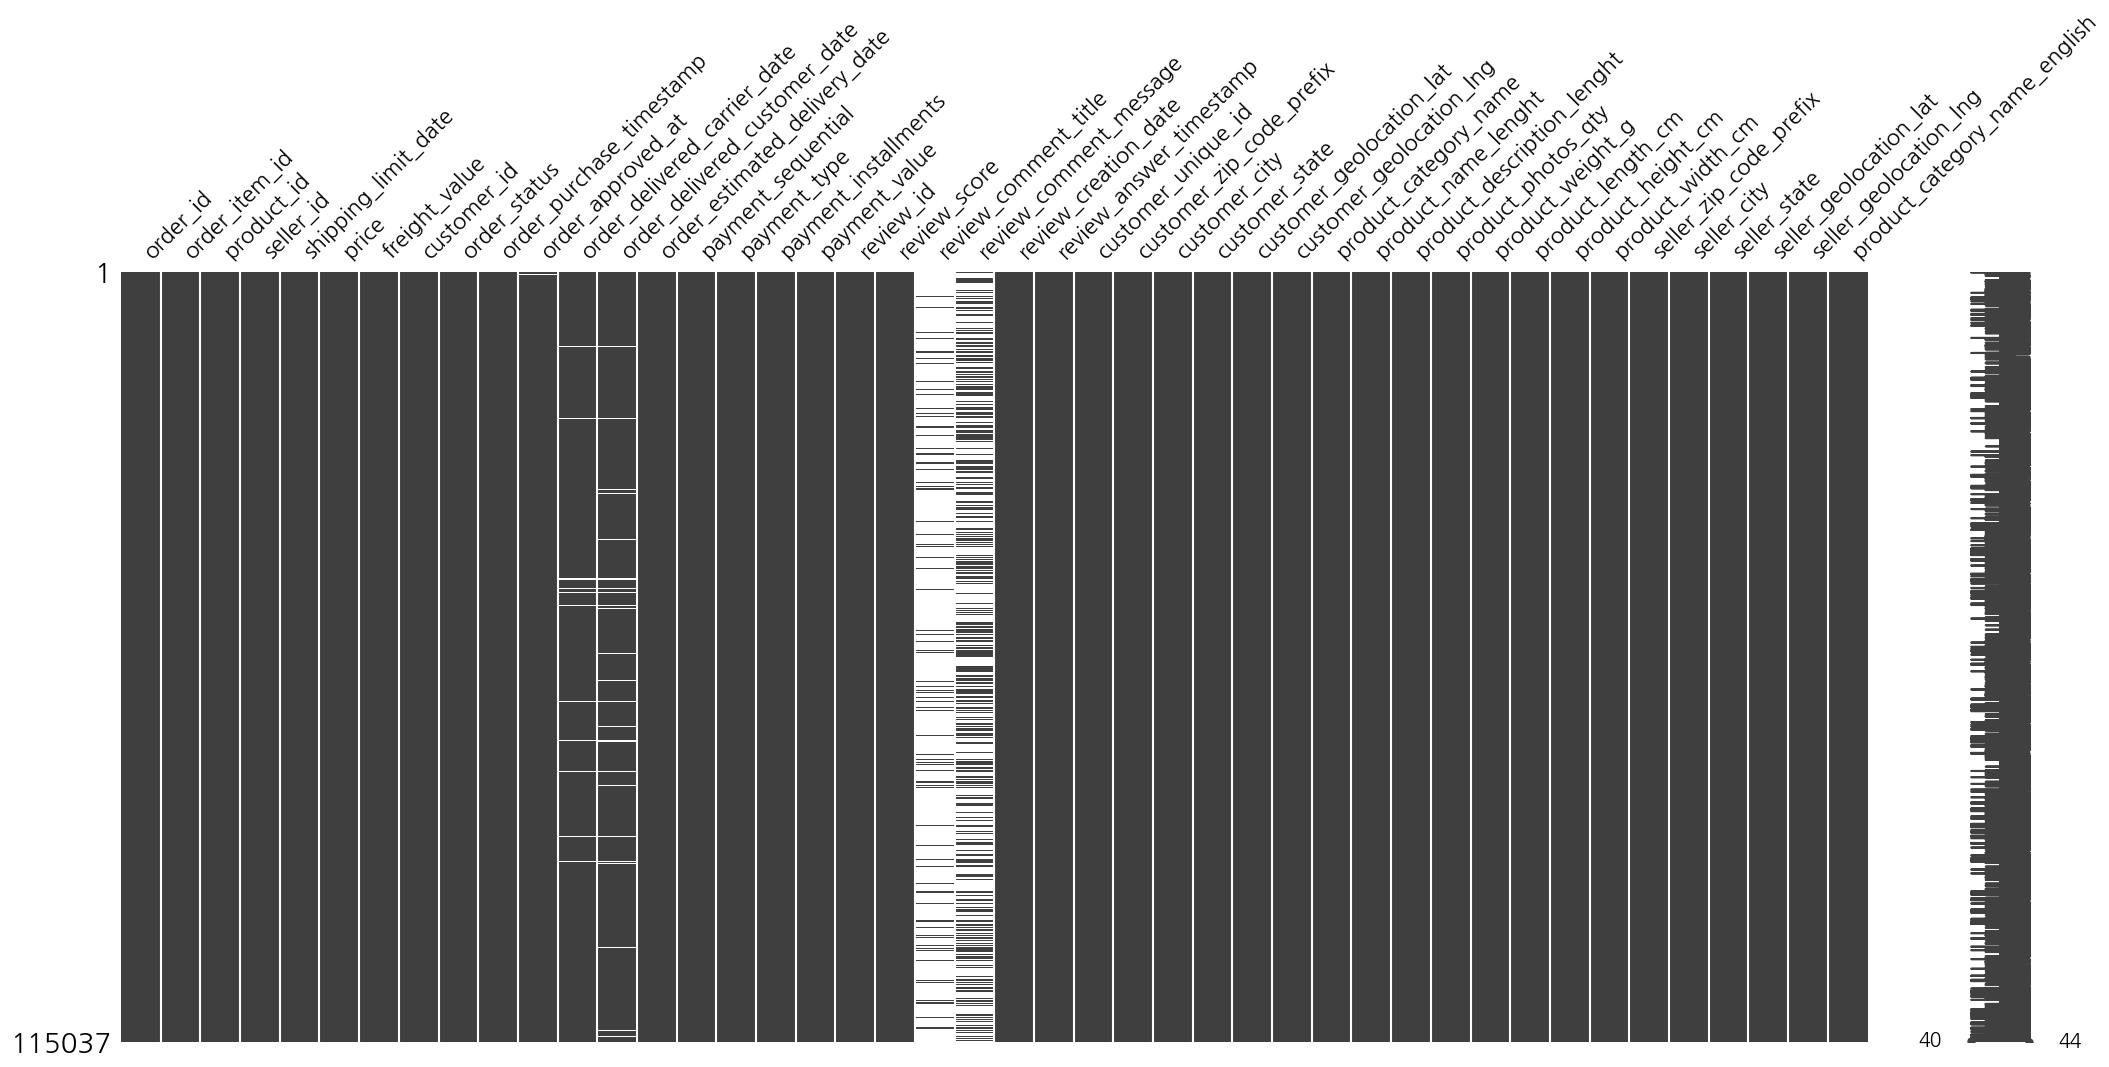

In [ ]:
print(df.isnull().sum())
msno.matrix(df)

# 3. EDA

## 1) 데이터 탐색 1

In [ ]:
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'customer_geolocation_lat', 'customer_geolocation_lng',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_geolocation_lat

### 데이터 시각화 함수 모음

In [ ]:
def draw_count_graph_base(df, col):
    ax = sns.countplot(data=df, x=col)
    ax.set_yscale("log")

def draw_count_graph(df, col):
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    ax.set_yscale("log")

def draw_count_graph_order(df, col, order_list):
    ax = sns.countplot(data=df, x=col, order=order_list)
    ax.set_yscale("log")

def draw_count_graph_top10(df, col):
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().head(10).index)
    ax.set_yscale("log")

def draw_count_graph_y_top10(df, col):
    ax = sns.countplot(data=df, y=col, order=df[col].value_counts().head(10).index)
    ax.set_xscale("log")

# 값 표시
def input_value(ax):
    for p in ax.patches:
        ax.text(p.get_x() + (p.get_width()/2),
                p.get_y() + p.get_height(),
                f'{p.get_height():.0f}',
                ha='center')
# 값 표시(가로)
def input_value_y(ax):
    for p in ax.patches:
        x, y, width, height = p.get_bbox().bounds
        ax.text(width*1.01, y+height/2, f'{width:.0f}', va='center')

def draw_boxplot(df, col):
    ax = sns.boxplot(df, y=col)
    ax.set_yscale("log")

def draw_boxplot_hue(df, col, hue):
    ax = sns.boxplot(df, y=col, hue=hue)
    ax.set_yscale("log")

def draw_barplot(df, col, order_list):
    ax = sns.barplot(data=df, x=df.index, y=col, order=order_list)
    ax.set_yscale("log")

def draw_count_pie(df, col, title1, title2):
    f, ax = plt.subplots(1,2, figsize=(12,5))
    plt.subplot(121)
    plt.title(title1)
    ax1 = sns.countplot(data=df, x=col)
    ax1.set_yscale("log")

    sum_cnt = df[col].value_counts()
    rate_cnt = sum_cnt / len(df[col]) * 100
    plt.subplot(122)
    plt.title(title2)
    plt.pie(rate_cnt, labels=df[col].unique(), autopct='%.2f%%')

### a. Customer

In [ ]:
print(len(df))
print('customer_id : ', len(df['customer_id'].unique()))
print('customer_unique_id : ', len(df['customer_unique_id'].unique()))
df.head(2)

115037
customer_id :  96036
customer_unique_id :  92939


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff


In [ ]:
df[df['customer_unique_id'].duplicated(keep='first')]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english
9,df2d910b8b5e5f461f67043489f9569d,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-06-09 14:31:21,55.90,35.71,2e76c1f2a920153d79cc98b634c50942,delivered,2017-06-05 12:22:19,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
10,df2d910b8b5e5f461f67043489f9569d,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-06-09 14:31:21,55.90,35.71,2e76c1f2a920153d79cc98b634c50942,delivered,2017-06-05 12:22:19,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
18,c9ef97d2854afe64a3b4488bc2836af6,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-08-14 04:25:34,58.90,17.83,0a29abf475fb8039d2775913d6f0b6f0,delivered,2017-08-05 16:59:05,...,530.0,30.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
39,5a65cedc025f607cbdb4c5219f648ae3,1,54e5939fcd9ae70ad0f59f612d6d29bd,48436dade18ac8b2bce089ec2a041202,2017-10-05 11:24:47,42.90,9.94,9eb85dfb61032b308cd9dafec6fcb3ee,delivered,2017-09-30 11:11:25,...,550.0,27.0,10.0,15.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
40,5a65cedc025f607cbdb4c5219f648ae3,1,54e5939fcd9ae70ad0f59f612d6d29bd,48436dade18ac8b2bce089ec2a041202,2017-10-05 11:24:47,42.90,9.94,9eb85dfb61032b308cd9dafec6fcb3ee,delivered,2017-09-30 11:11:25,...,550.0,27.0,10.0,15.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115017,d18585adacf5dc420841dfb67243a224,1,43f224fb79bae5b22585eb868fe3b84b,0ddefe3c7a032b91f4e25b9c3a08fca1,2018-08-28 12:55:28,49.90,9.10,cb51e319e8c3bcea224283ec1cbad11f,delivered,2018-08-24 12:41:33,...,550.0,19.0,12.0,17.0,9721,sao bernardo do campo,SP,-23.719646,-46.547525,arts_and_craftmanship
115022,9980064d9817bacc9e261e7f5fcf3fe5,1,ec90895370885d025efeb8e72e7fa699,e7f3bf1ecd8526eb7f3b18059e6716e5,2017-07-18 07:03:41,129.90,15.66,e30e0257e1c7189e6f6ba4ef151e717c,delivered,2017-07-12 06:48:11,...,1200.0,20.0,20.0,16.0,11680,ubatuba,SP,-23.452929,-45.093219,arts_and_craftmanship
115028,7f6a7361266d9b404f05250ef42cdc6d,1,b9976e9c22fb1540bd71d1bcd2989475,55f7a3319d80f7fdf078b8f03e6725fe,2018-08-22 10:50:18,126.49,14.19,2f5d35989878187f33b6e601743b55f5,delivered,2018-08-17 23:14:16,...,2550.0,46.0,16.0,25.0,6056,osasco,SP,-23.566293,-46.787821,arts_and_craftmanship
115030,cc9760bf7b5d5b74c4d1eb1ab6405b50,1,54b391a91c3b1a1e22af86434155834d,2ea0861cc19e94cad86438c984c52da4,2018-07-24 04:35:13,9.80,13.68,e618ce61b7a6c510ada191f657306c68,delivered,2018-07-17 13:32:49,...,267.0,24.0,7.0,13.0,3731,sao paulo,SP,-23.510860,-46.536760,arts_and_craftmanship


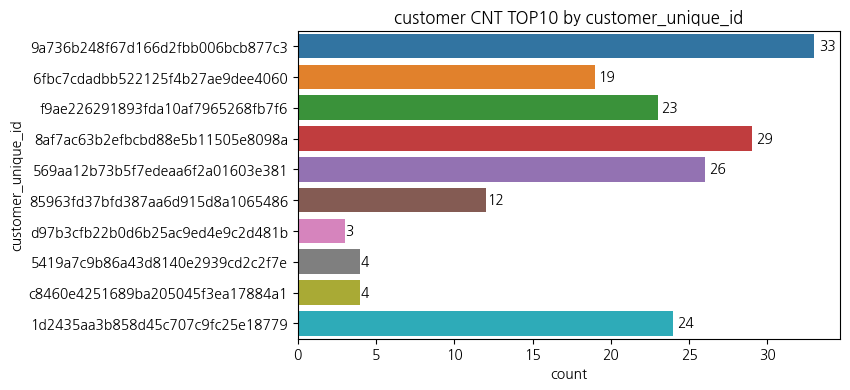

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
plt.title('customer CNT TOP10 by customer_unique_id')
# draw_count_graph_y_top10(df, 'customer_unique_id')
sns.countplot(data=df[df['order_item_id'] == 1], y='customer_unique_id', order=df['customer_unique_id'].value_counts().head(10).index)
input_value_y(ax)

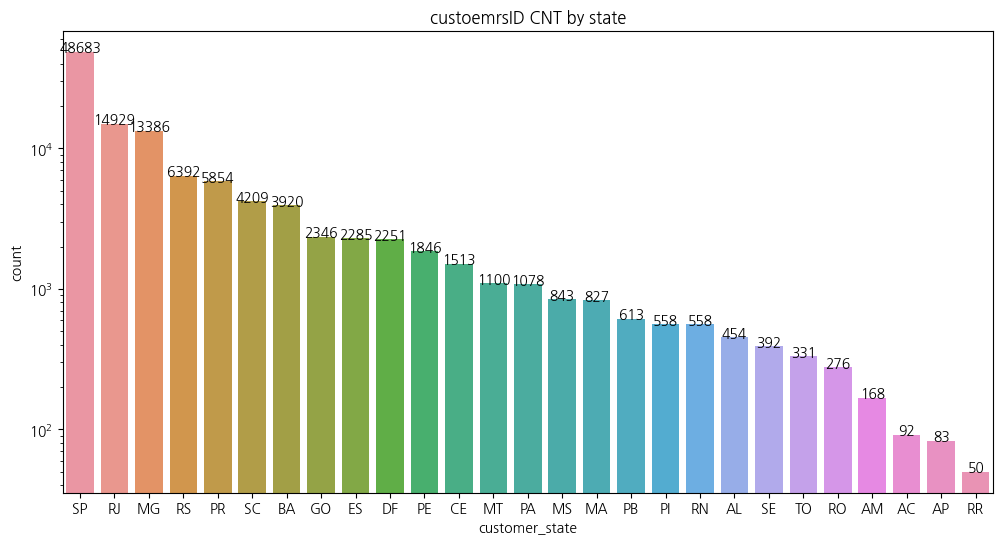

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title('custoemrsID CNT by state')
draw_count_graph(df, 'customer_state')
input_value(ax)

- top5 주 : 상파울루(SP), 리우데자네이루(RJ), 미나스제라이스(MG), 히우그란지두술(RS), 파라나(PR)

In [ ]:
print('customer_city : ', len(df['customer_city'].unique()))
print('customer_state : ', len(df['customer_state'].unique()))

customer_city :  4044
customer_state :  27


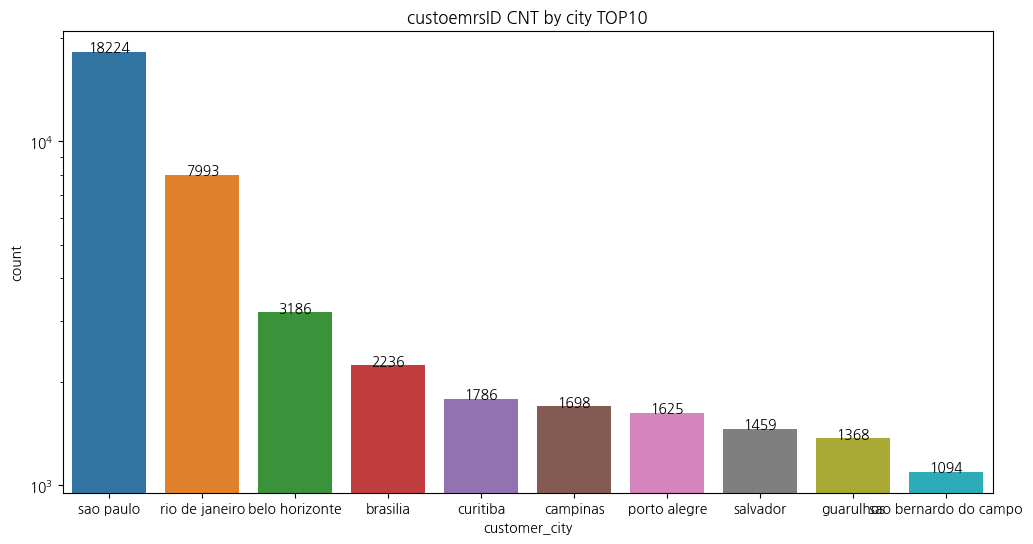

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title('custoemrsID CNT by city TOP10')
draw_count_graph_top10(df, 'customer_city')
input_value(ax)

### b. Geolocation

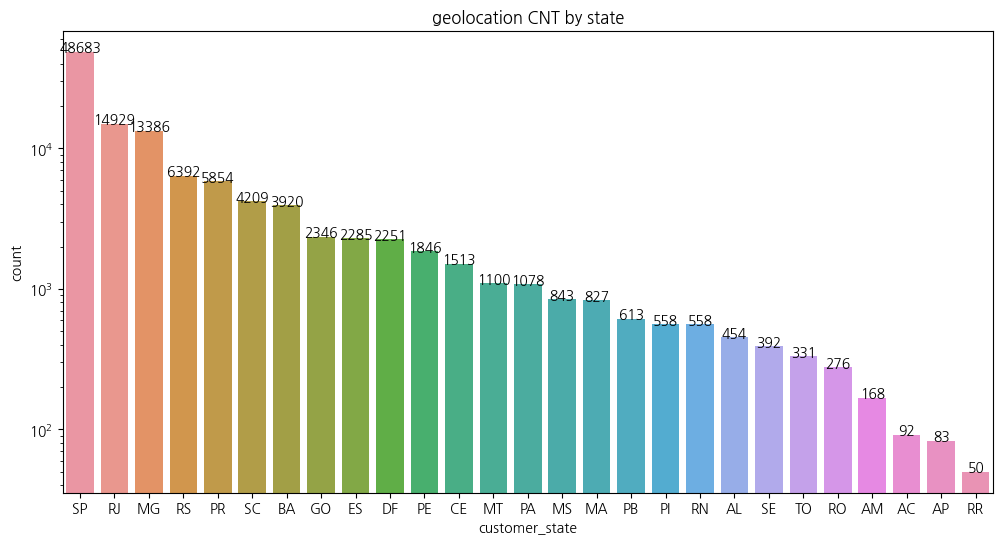

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title('geolocation CNT by state')
draw_count_graph(df, 'customer_state')
input_value(ax)

- geolocation top5 주 : 상파울루(SP), 리우데자네이루(RJ), 미나스제라이스(MG), 히우그란지두술(RS), 파라나(PR)

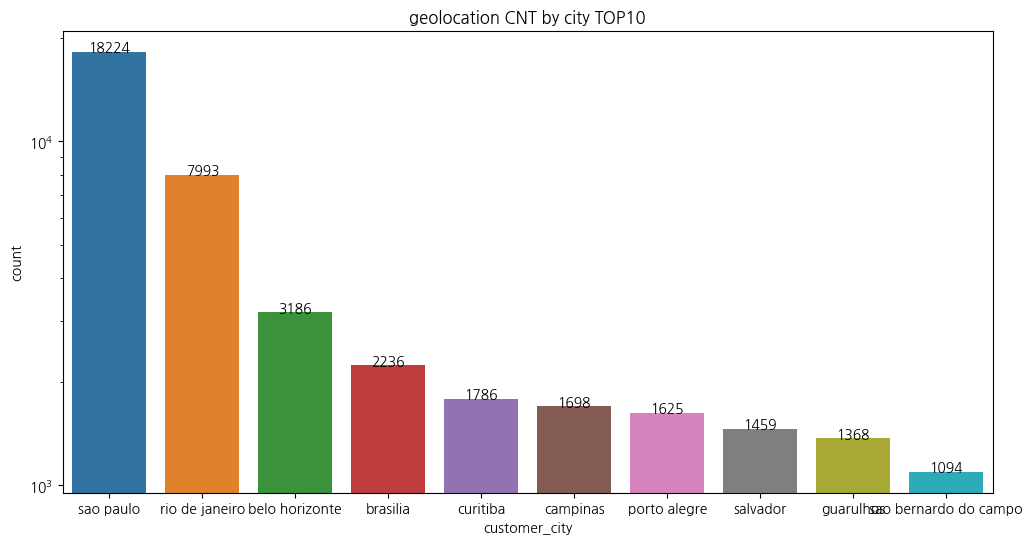

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title('geolocation CNT by city TOP10')
draw_count_graph_top10(df, 'customer_city')
input_value(ax)

### c. Order items

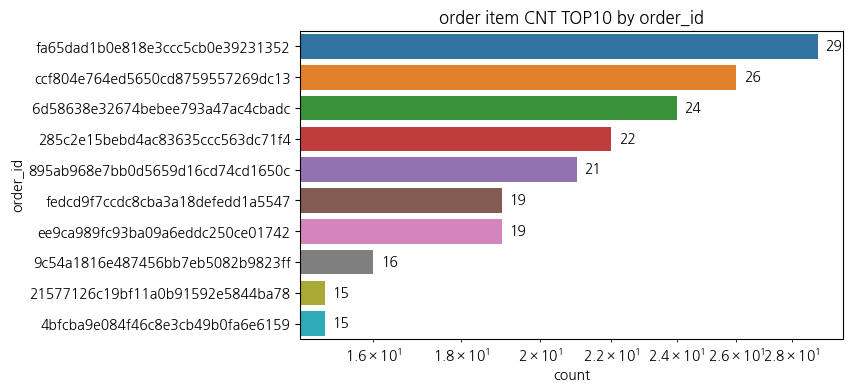

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
plt.title('order item CNT TOP10 by order_id')
draw_count_graph_y_top10(df[df['order_item_id'] == 1], 'order_id')
input_value_y(ax)

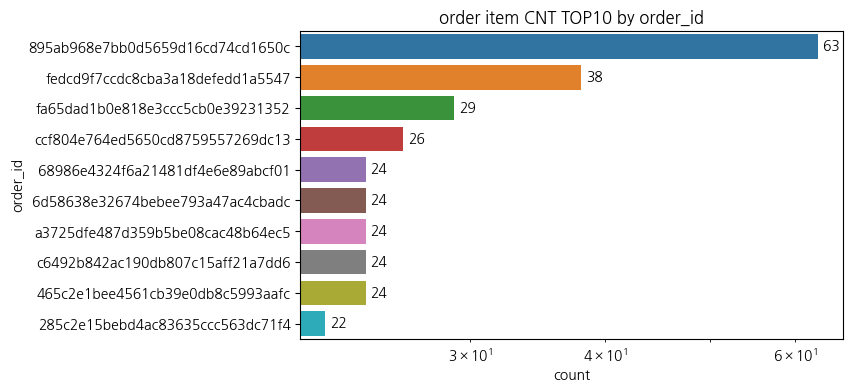

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
plt.title('order item CNT TOP10 by order_id')
draw_count_graph_y_top10(df, 'order_id')
input_value_y(ax)

* 주문 한 건을 할 때, 물건 여러 개를 주문하면 order_id가 주문 갯수만큼 생성된다.

In [ ]:
round(df.groupby('order_id')['order_item_id'].count().mean(),2)

1.2

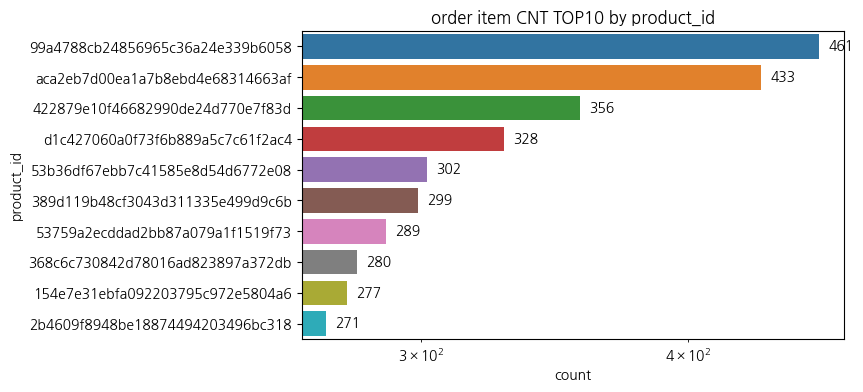

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
plt.title('order item CNT TOP10 by product_id')
draw_count_graph_y_top10(df[df['order_item_id'] == 1], 'product_id')
input_value_y(ax)

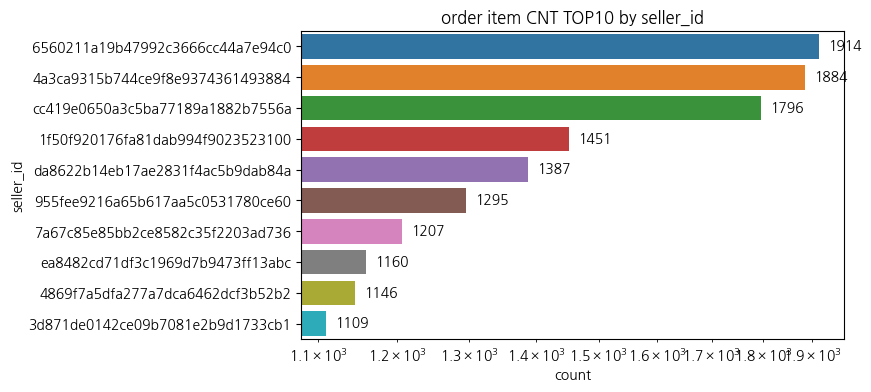

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
plt.title('order item CNT TOP10 by seller_id')
draw_count_graph_y_top10(df[df['order_item_id'] == 1], 'seller_id')
input_value_y(ax)

### d. Price

In [ ]:
# price_category
for i in range(7000, 0, -1000):
    df.loc[df['price']<=i, 'price_category'] = i

# freight_category
for j in range(500, 0, -100):
    df.loc[df['freight_value']<=j, 'freight_category'] = j

# 세분화
df['price_specialize'] = None
df['freight_specialize'] = None

# price_specialize
for i in range(1000, 0, -100):
    df.loc[df['price']<=i, 'price_specialize'] = i

# freight_specialize
for j in range(100, 0, -10):
    df.loc[df['freight_value']<=j, 'freight_specialize'] = j

# free freight
df.loc[df['freight_value']==0, 'free_freight'] = True
df.loc[df['freight_value']>0, 'free_freight'] = False

df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english,price_category,freight_category,price_specialize,freight_specialize,free_freight
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,volta redonda,SP,-22.496953,-44.127492,cool_stuff,1000.0,100.0,100,20,False
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,volta redonda,SP,-22.496953,-44.127492,cool_stuff,1000.0,100.0,100,20,False
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,volta redonda,SP,-22.496953,-44.127492,cool_stuff,1000.0,100.0,100,20,False
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,volta redonda,SP,-22.496953,-44.127492,cool_stuff,1000.0,100.0,100,20,False
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,volta redonda,SP,-22.496953,-44.127492,cool_stuff,1000.0,100.0,100,20,False


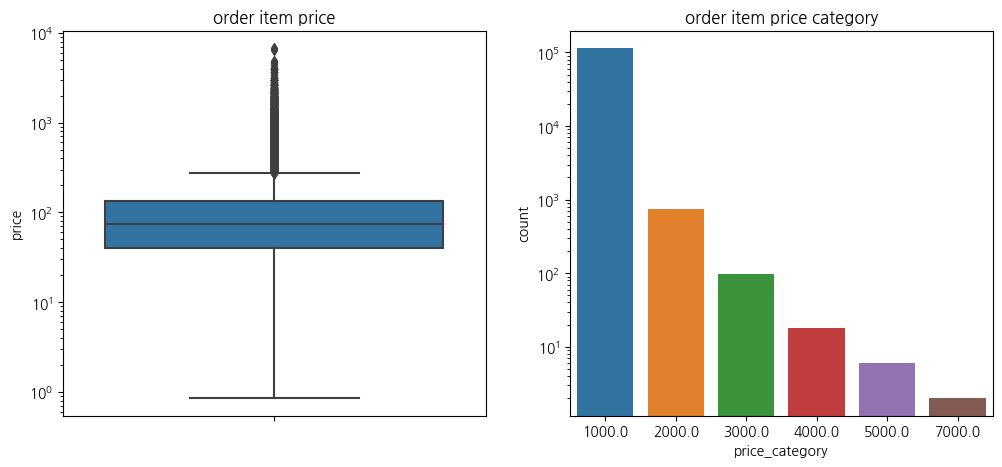

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5));
plt.subplot(121)
plt.title('order item price')
draw_boxplot(df, 'price')
plt.subplot(122)
plt.title('order item price category')
draw_count_graph(df, 'price_category')

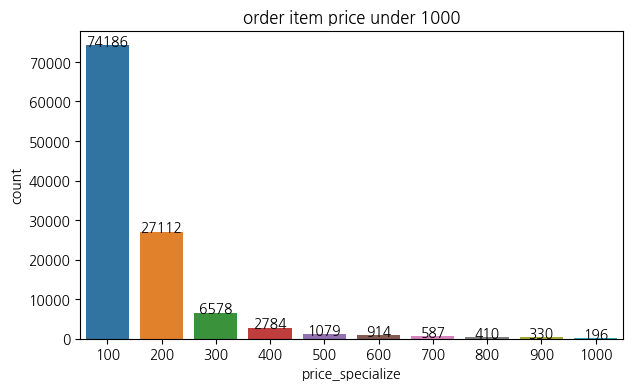

In [ ]:
order = [100,200,300,400,500,600,700,800,900,1000]
fig, ax = plt.subplots(figsize=(7,4))
plt.title('order item price under 1000')
sns.countplot(data=df, x='price_specialize', order=order);
input_value(ax)

In [ ]:
print('price mean : ', round(df['price'].mean(), 2))
print('price max : ', df['price'].max())
print('price min : ', df['price'].min())

price mean :  120.65
price max :  6735.0
price min :  0.85


- 브라질 통화 단위 : R$(헤알)
- 대부분의 제품이 500헤알 이하의 가격이다.
- 1000 헤알 이하의 가격이 압도적으로 많다.
- 1000 헤알 이하의 가격대에서 세부적으로 보면, 100 헤알 이하의 가격이 가장 많다.
- 평균 120.65 헤알이다.
- 최고 가격 : 6735 헤알
- 최저 가격 : 0.85 헤알

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


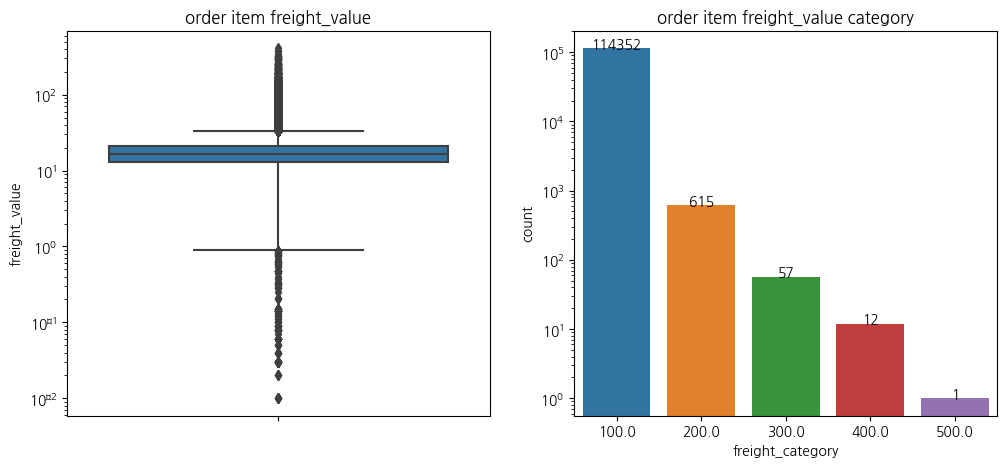

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5))
plt.subplot(121)
plt.title('order item freight_value')
draw_boxplot(df, 'freight_value')

plt.subplot(122)
plt.title('order item freight_value category')
draw_count_graph(df, 'freight_category')
input_value(ax[1])

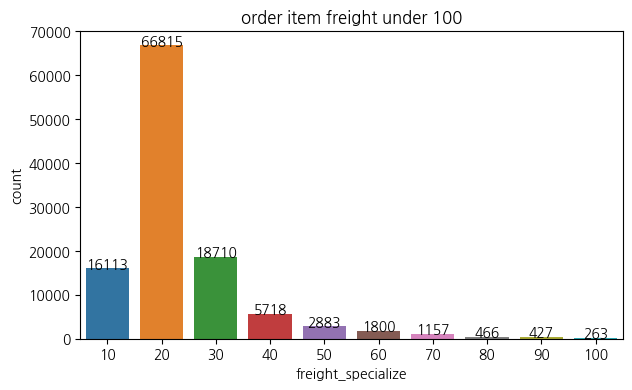

In [ ]:
order = [10,20,30,40,50,60,70,80,90,100]
fig, ax = plt.subplots(figsize=(7,4))
plt.title('order item freight under 100')
sns.countplot(data=df, x='freight_specialize', order=order);
input_value(ax)

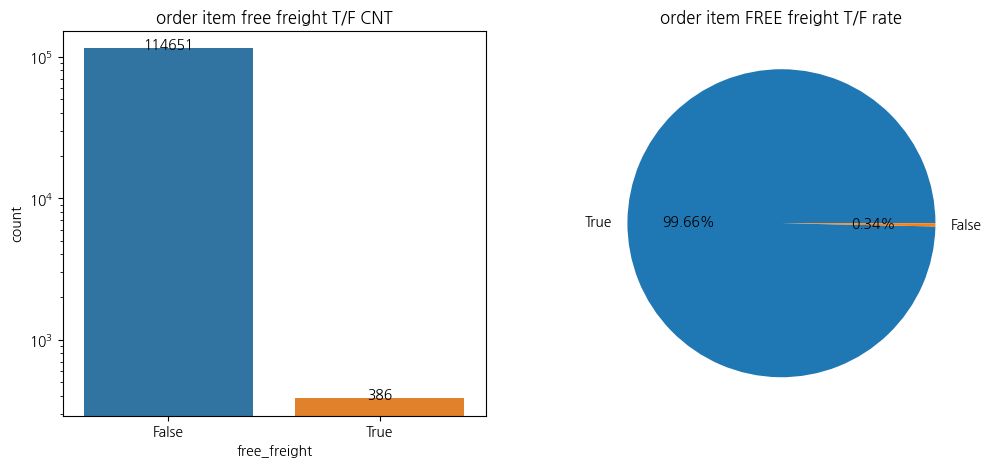

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5));
plt.subplot(121)
plt.title('order item free freight T/F CNT')
draw_count_graph(df, 'free_freight')
input_value(ax[0])

sum_free_yn = df['free_freight'].value_counts()
ratop_free_yn = sum_free_yn / len(df['free_freight']) * 100
plt.subplot(122)
plt.title('order item FREE freight T/F rate')
plt.pie(ratop_free_yn,
        labels=[True, False],
        autopct='%.2f%%');

In [ ]:
print('freight_value mean : ', round(df['freight_value'].mean(), 2))
print('freight_value max : ', df['freight_value'].max())
print('freight_value min : ', df['freight_value'].min())

freight_value mean :  20.05
freight_value max :  409.68
freight_value min :  0.0


- 대부분의 제품이 50헤알 이하의 운송료다.
- 100 이하의 운송료가 압도적으로 많다.
- 100 헤알 이하의 운송료에서 세부적으로 보면, 10~20 헤알의 운송료가 가장 많다.
- 무료배송은 0.34%로 매우 적다
- 평균 20.05 헤알이다.
- 최고 운송료 : 409.68 헤알
- 최저 운송료 : 무료

### e. Order payments

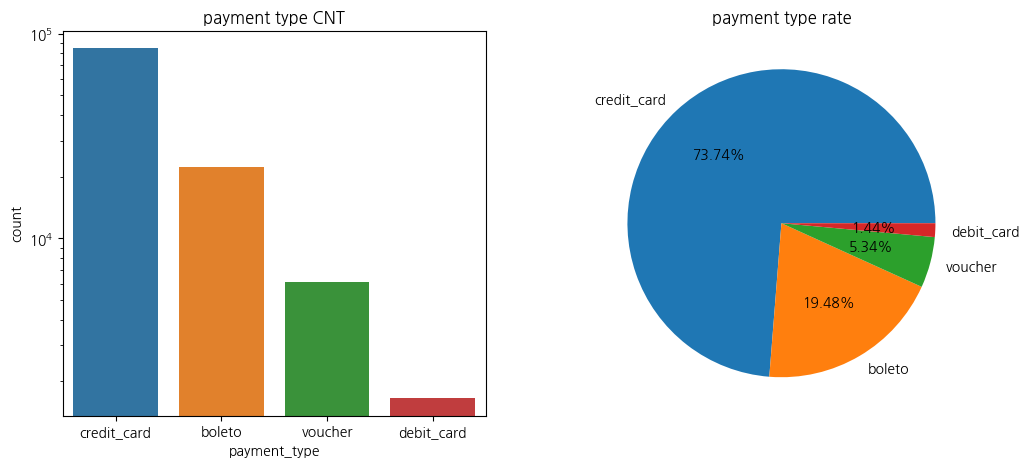

In [ ]:
draw_count_pie(df, 'payment_type', 'payment type CNT', 'payment type rate')

- 신용카드 결제가 가장 많은 비중을 차지
- 그 다음으로는 볼레토라는 브라질의 결제 방법

In [ ]:
payment_type_df = df.groupby('payment_type')['payment_value'].agg(['sum', 'mean'])
payment_type_df

,sum,mean
payment_type,,
boleto,3962650.59,176.856672
credit_card,15227339.89,179.495720
debit_card,248904.37,150.395390
voucher,394553.09,64.238536


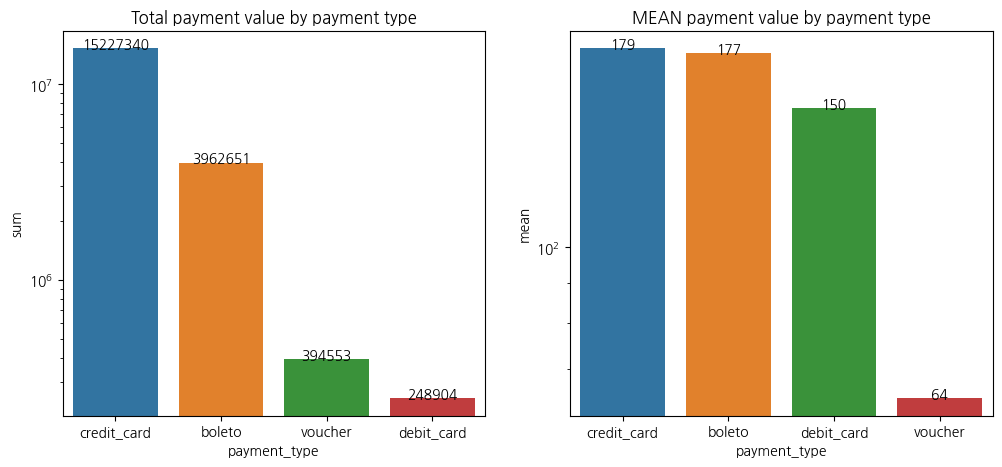

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5));
order_list = payment_type_df['sum'].sort_values(ascending=False).index
plt.subplot(121)
plt.title('Total payment value by payment type')
draw_barplot(payment_type_df, 'sum', order_list)
input_value(ax[0])

order_list = payment_type_df['mean'].sort_values(ascending=False).index
plt.subplot(122)
plt.title('MEAN payment value by payment type')
draw_barplot(payment_type_df, 'mean', order_list)
input_value(ax[1])

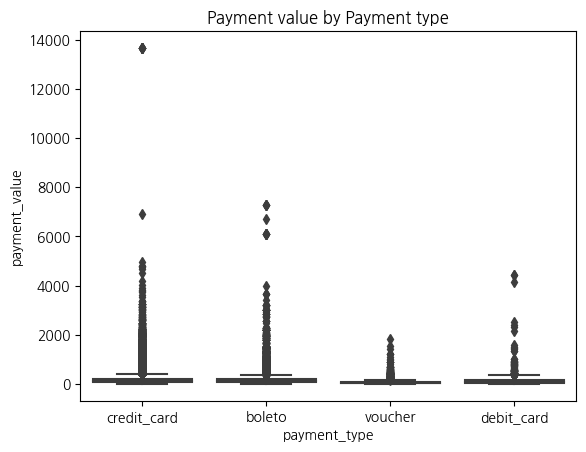

In [ ]:
plt.title('Payment value by Payment type')
sns.boxplot(df, x='payment_type', y='payment_value');

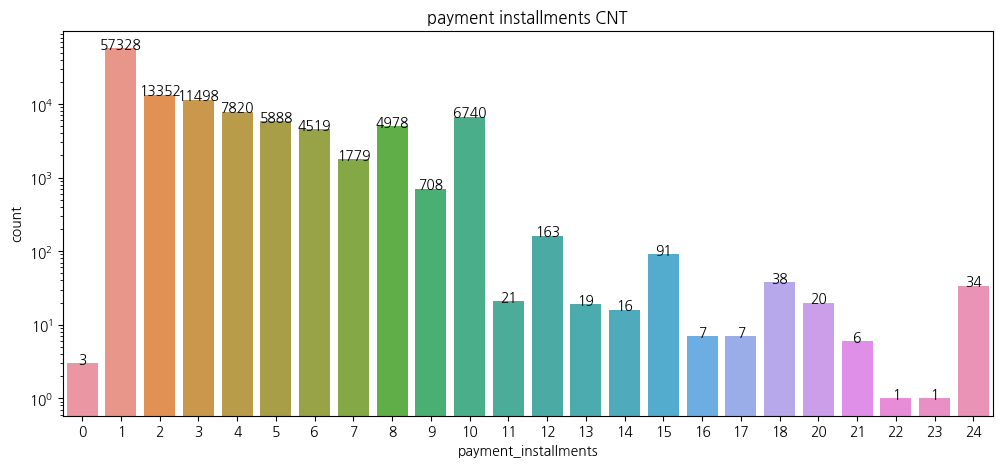

In [ ]:
f, ax = plt.subplots(figsize=(12,5));
plt.title('payment installments CNT')
draw_count_graph_base(df, 'payment_installments')
input_value(ax)

### f. Order reviews

In [ ]:
df.loc[df['review_score']>3, 'P/N'] = 'Positive'
df.loc[df['review_score']==3, 'P/N'] = 'Normal'
df.loc[df['review_score']<3, 'P/N'] = 'Negative'
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english,price_category,freight_category,price_specialize,freight_specialize,free_freight,P/N
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,SP,-22.496953,-44.127492,cool_stuff,1000.0,100.0,100,20,False,Positive
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,SP,-22.496953,-44.127492,cool_stuff,1000.0,100.0,100,20,False,Positive
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,SP,-22.496953,-44.127492,cool_stuff,1000.0,100.0,100,20,False,Positive
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,SP,-22.496953,-44.127492,cool_stuff,1000.0,100.0,100,20,False,Positive
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,SP,-22.496953,-44.127492,cool_stuff,1000.0,100.0,100,20,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115032,2c12150c742ae2fa48bc703964c16c5f,1,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,...,SP,-22.294360,-48.558524,arts_and_craftmanship,1000.0,100.0,100,20,False,Positive
115033,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,SP,-22.294360,-48.558524,arts_and_craftmanship,1000.0,100.0,100,20,False,Normal
115034,2ef4a11b6e24fdfbb43b92cb5f95edff,2,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,39.90,12.87,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,SP,-22.294360,-48.558524,arts_and_craftmanship,1000.0,100.0,100,20,False,Normal
115035,9f7ba492c273ffac8f90a623b8eadd3b,1,5aa0d6ed4e6c0995d62090cd82cde89a,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-28 03:24:24,11.90,12.79,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,...,SP,-22.294360,-48.558524,arts_and_craftmanship,1000.0,100.0,100,20,False,Positive


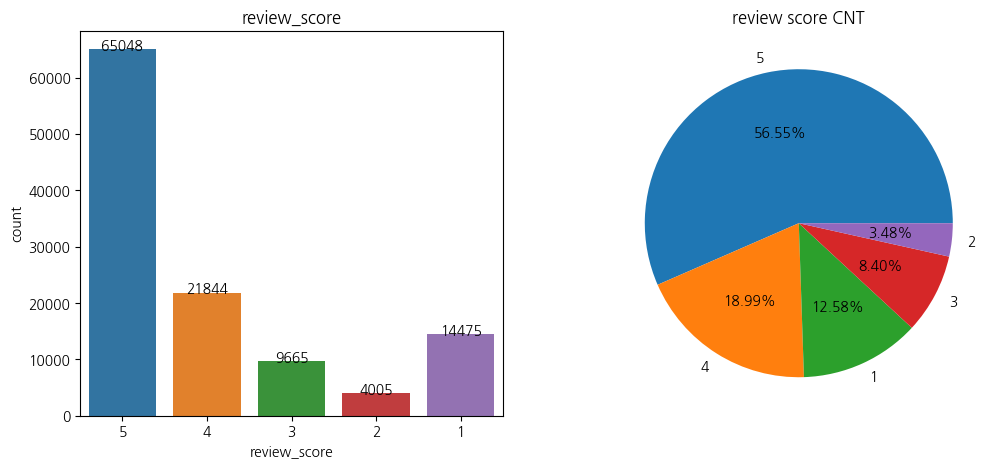

In [ ]:
order_list = [5,4,3,2,1]
f, ax = plt.subplots(1,2, figsize=(12,5));
plt.subplot(121)
plt.title('review_score')
sns.countplot(data=df, x='review_score', order=order_list);
input_value(ax[0])

sum_cnt = df['review_score'].value_counts()
rate_cnt = sum_cnt / len(df['review_score']) * 100
plt.subplot(122)
plt.title('review score CNT')
plt.pie(rate_cnt,
        labels=rate_cnt.index,
        autopct='%.2f%%');

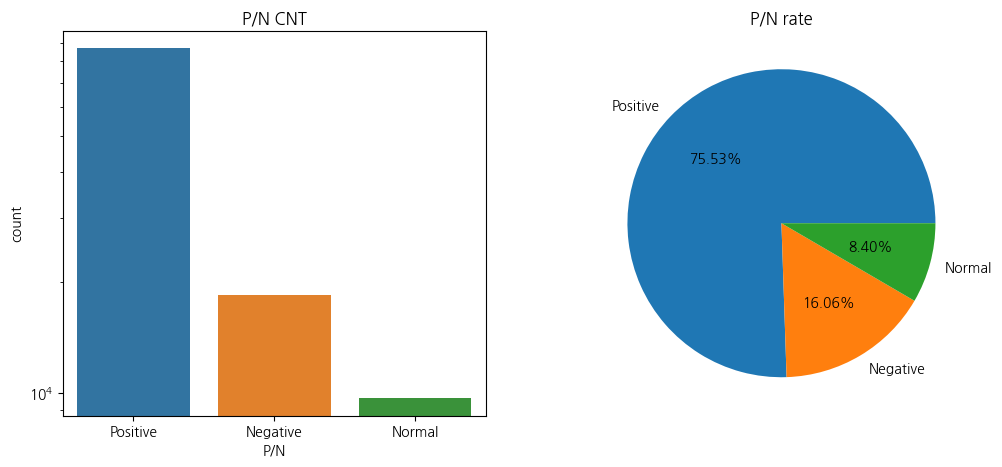

In [ ]:
pn_reviews_df = df[df['P/N'].notna()]
draw_count_pie(pn_reviews_df, 'P/N', 'P/N CNT', 'P/N rate')

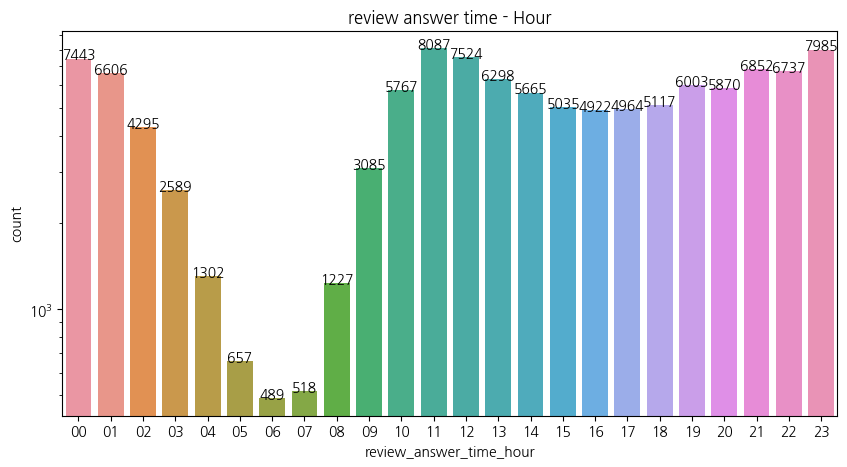

In [ ]:
df['review_answer_time_hour'] = df['review_answer_timestamp'].str[-8:-6]
order_list = df['review_answer_time_hour'].unique()
order_list.sort()
fig, ax = plt.subplots(figsize=(10,5))
plt.title('review answer time - Hour')
draw_count_graph_order(df, 'review_answer_time_hour', order_list)
input_value(ax)

### g. Orders

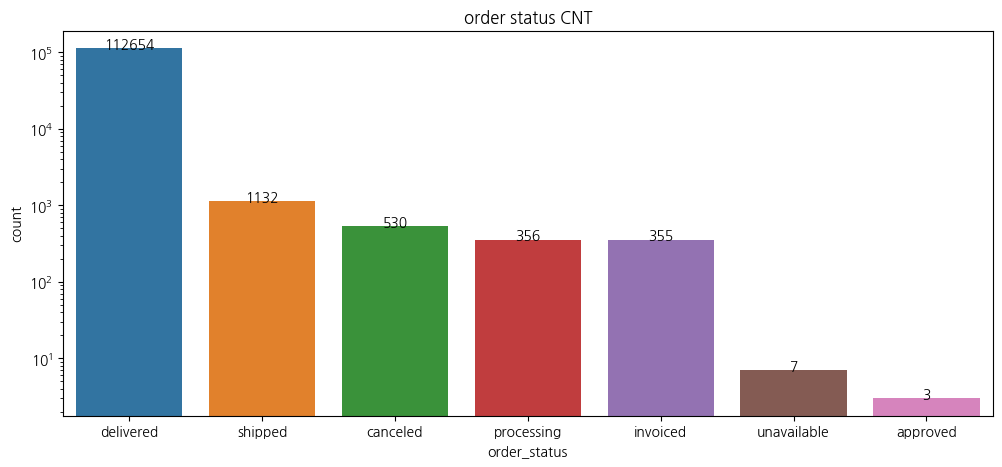

In [ ]:
f, ax = plt.subplots(figsize=(12,5))
plt.title('order status CNT')
draw_count_graph(df, 'order_status')
input_value(ax)

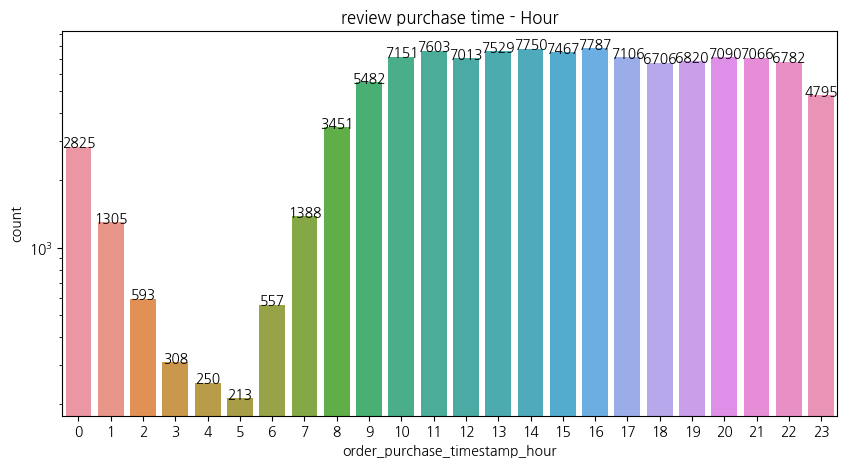

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

df['order_purchase_timestamp_hour'] = df['order_purchase_timestamp'].dt.hour
order_list = df['order_purchase_timestamp_hour'].unique()
order_list.sort()
fig, ax = plt.subplots(figsize=(10,5))
plt.title('review purchase time - Hour')
draw_count_graph_order(df, 'order_purchase_timestamp_hour', order_list)
input_value(ax)

### h. Products

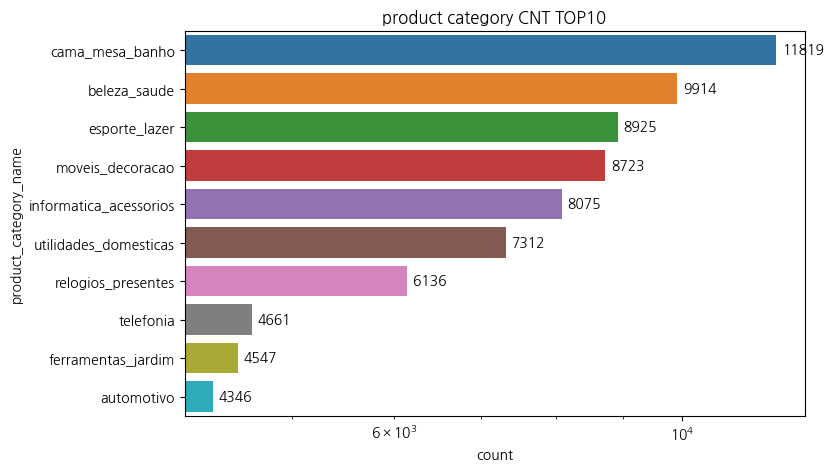

In [ ]:
f, ax = plt.subplots(figsize=(8, 5))
plt.title('product category CNT TOP10')
draw_count_graph_y_top10(df, 'product_category_name')
input_value_y(ax)

- 침대 테이블 목욕, 스포츠 레저, 가구 장식, 미용과 건강, 가정용품, 자동차, 컴퓨터 액세서리, 장난감, 선물 시계, 전화 통신 카테고리 순서로 제품이 많다.

### i. Sellers

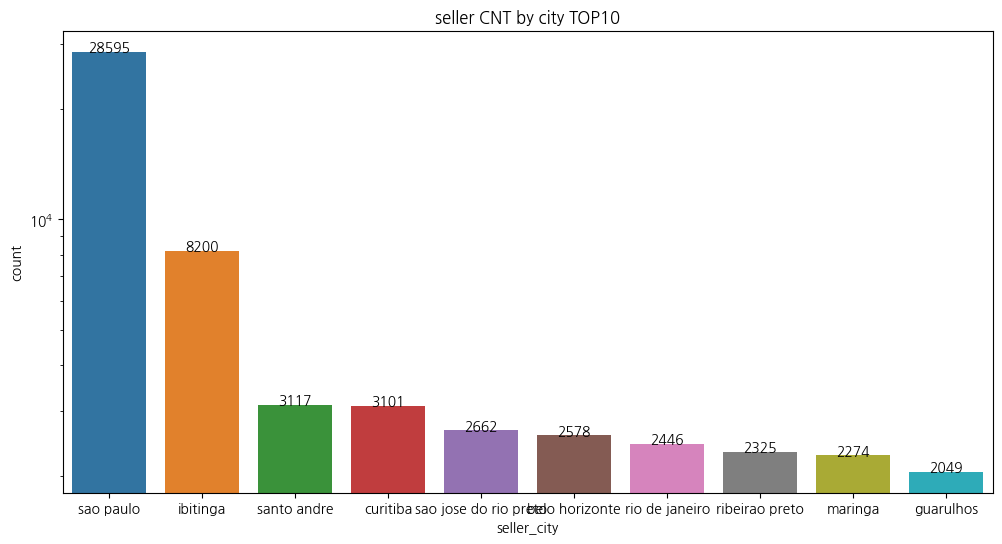

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title('seller CNT by city TOP10')
draw_count_graph_top10(df, 'seller_city')
input_value(ax)

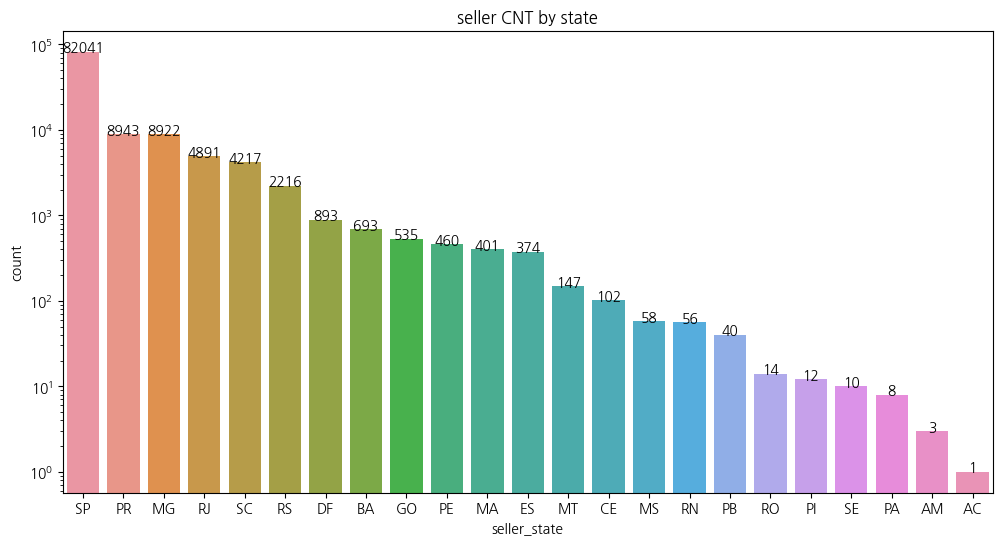

In [ ]:
f, ax = plt.subplots(figsize=(12,6))
plt.title('seller CNT by state')
draw_count_graph(df, 'seller_state')
input_value(ax)

## 2) 데이터 탐색 2

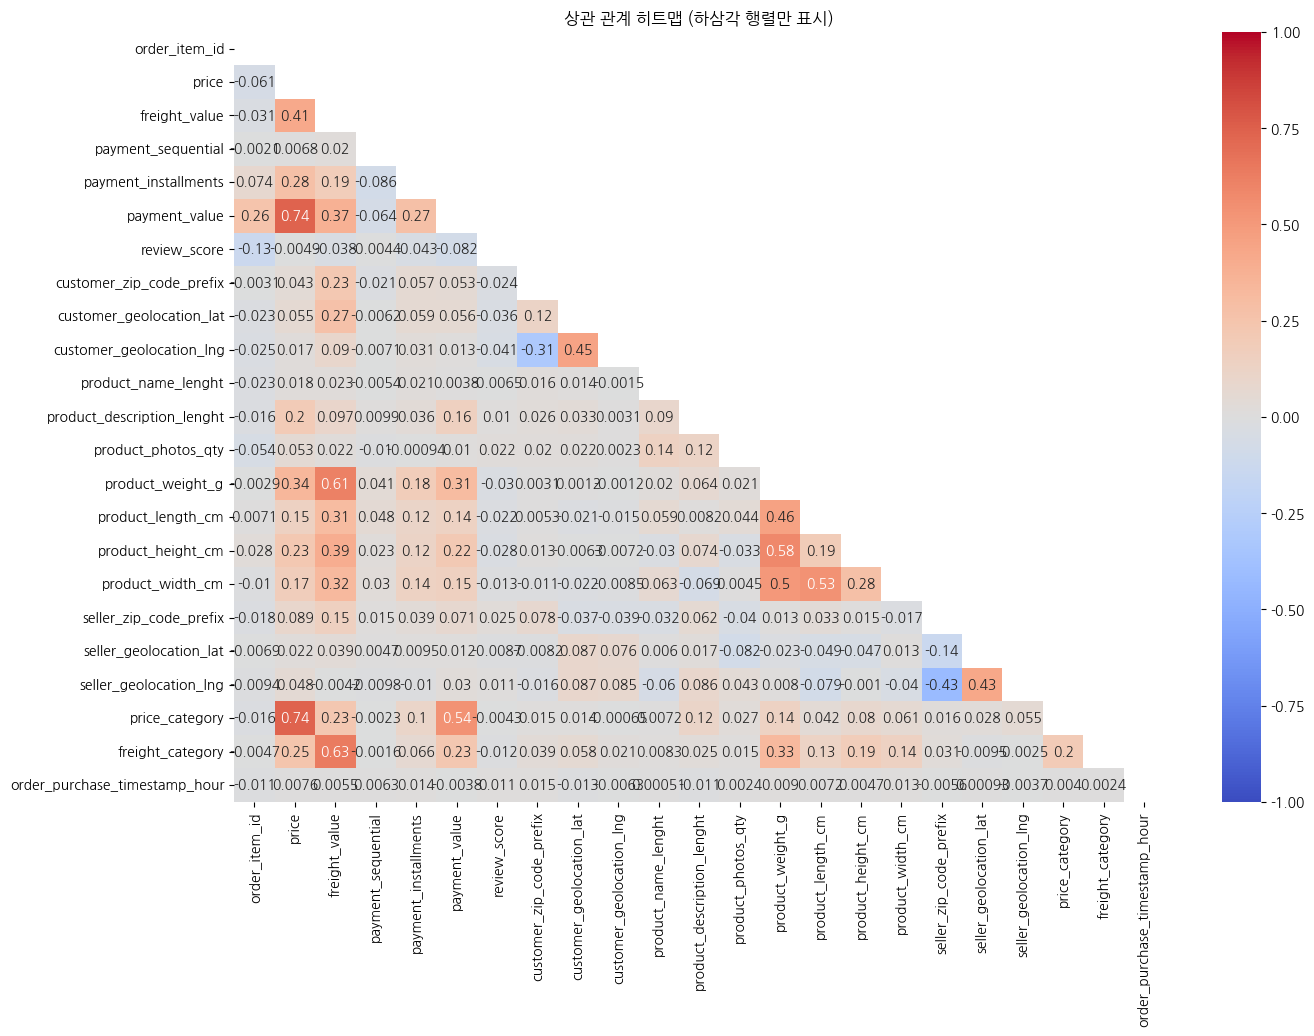

In [ ]:
# 숫자 형태의 컬럼만 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 상관 계수 계산
corr_matrix = df[numeric_cols].corr()

# 상삼각 행렬 마스킹
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
plt.title("상관 관계 히트맵 (하삼각 행렬만 표시)")
plt.show()

#### 품목별 주문 건수, 배송시간, 가격

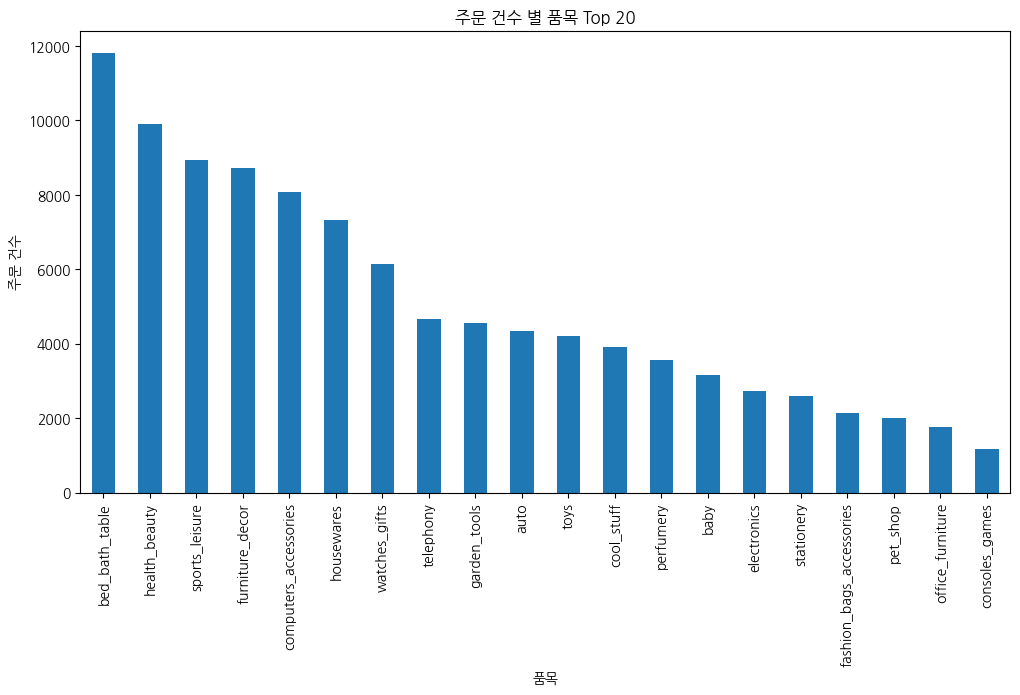

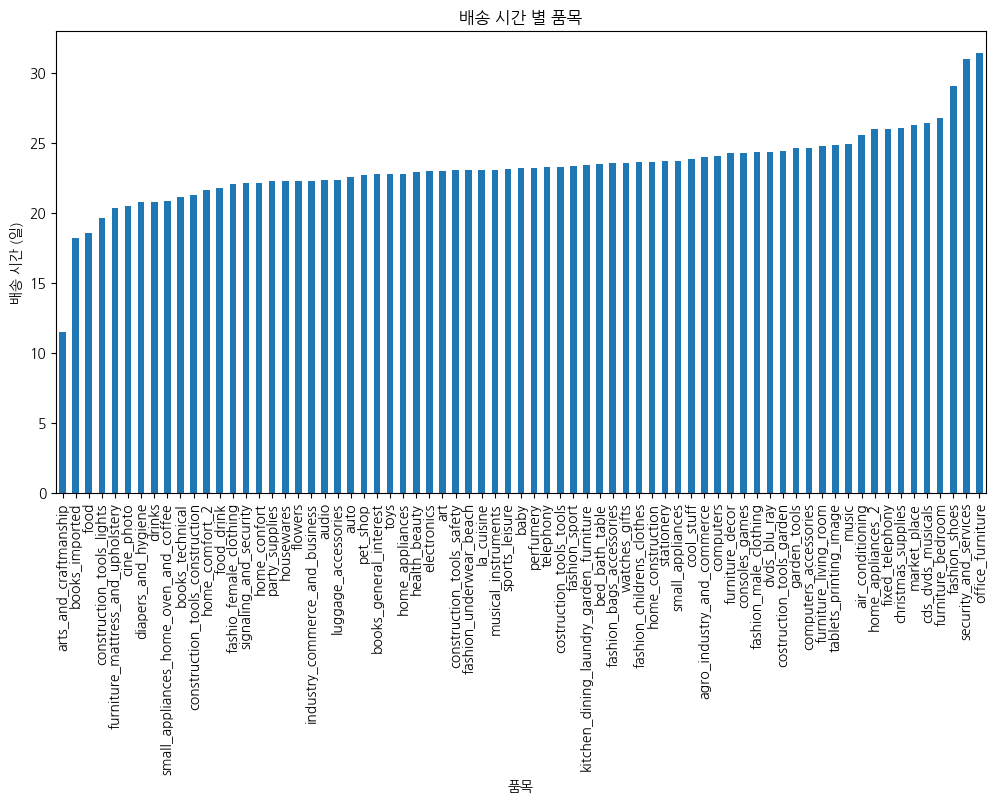

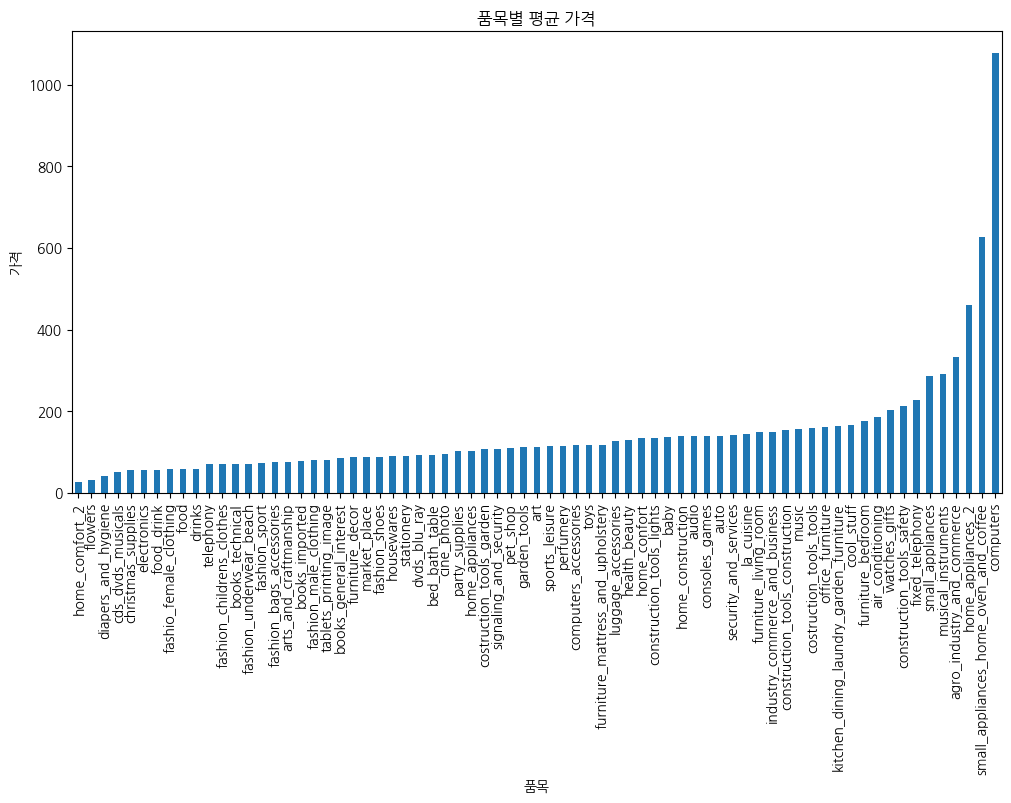

In [ ]:
# 품목별 주문 건수
plt.figure(figsize=(12, 6))
df['product_category_name_english'].value_counts().head(20).plot(kind='bar')
plt.title('주문 건수 별 품목 Top 20')
plt.ylabel('주문 건수')
plt.xlabel('품목')
plt.xticks(rotation=90)
plt.show()

# 품목별 배송 시간
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['delivery_time'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days
plt.figure(figsize=(12, 6))
df.groupby('product_category_name_english')['delivery_time'].mean().sort_values().plot(kind='bar')
plt.title('배송 시간 별 품목')
plt.ylabel('배송 시간 (일)')
plt.xlabel('품목')
plt.xticks(rotation=90)
plt.show()

# 품목별 가격
plt.figure(figsize=(12, 6))
df.groupby('product_category_name_english')['price'].mean().sort_values().plot(kind='bar')
plt.title('품목별 평균 가격')
plt.ylabel('가격')
plt.xlabel('품목')
plt.xticks(rotation=90)
plt.show()

#### 지역별 주문 건수, 배송시간

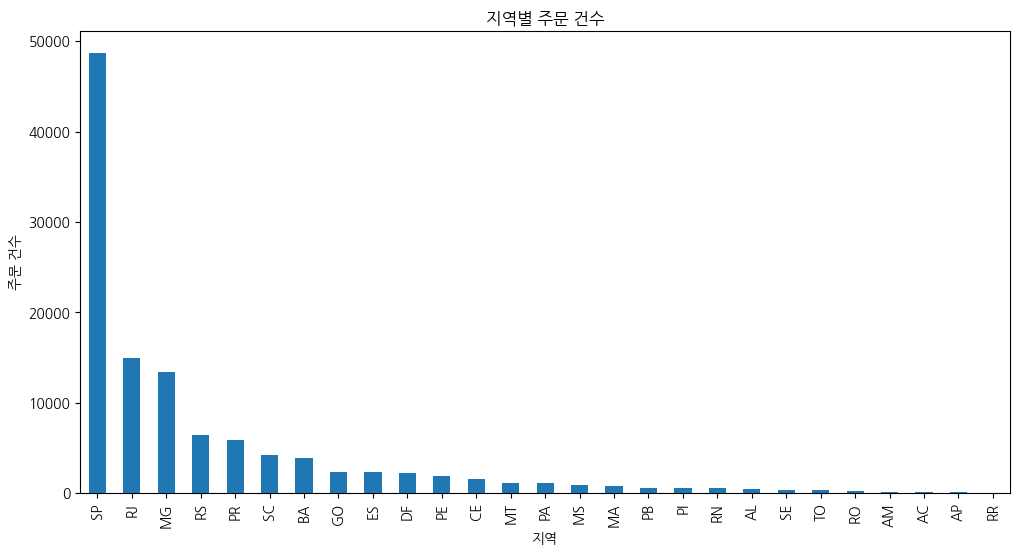

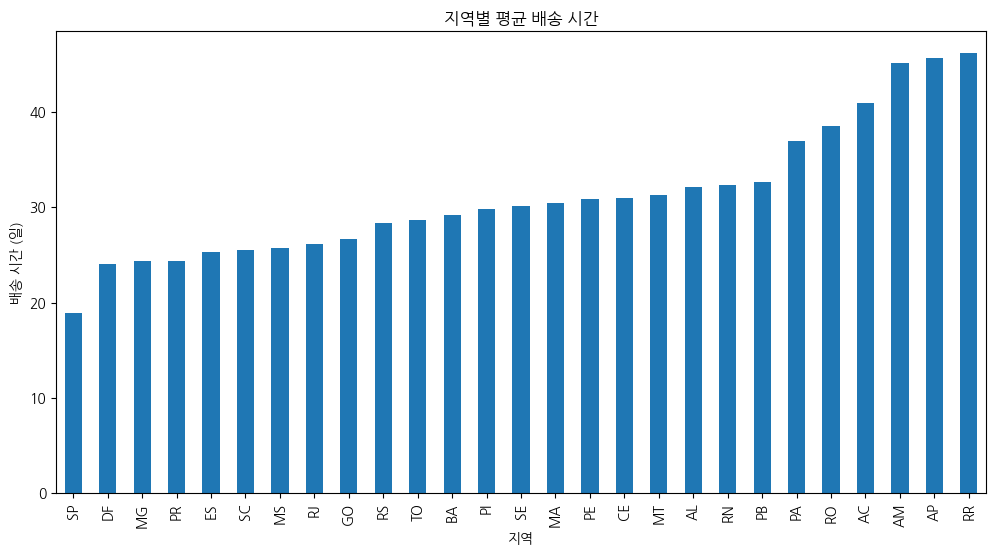

In [ ]:
# 지역별 주문 건수
plt.figure(figsize=(12, 6))
df['customer_state'].value_counts().plot(kind='bar')
plt.title('지역별 주문 건수')
plt.ylabel('주문 건수')
plt.xlabel('지역')
plt.show()

# 지역별 배송 시간
plt.figure(figsize=(12, 6))
df.groupby('customer_state')['delivery_time'].mean().sort_values().plot(kind='bar')
plt.title('지역별 평균 배송 시간')
plt.ylabel('배송 시간 (일)')
plt.xlabel('지역')
plt.show()

#### 고객들의 위치

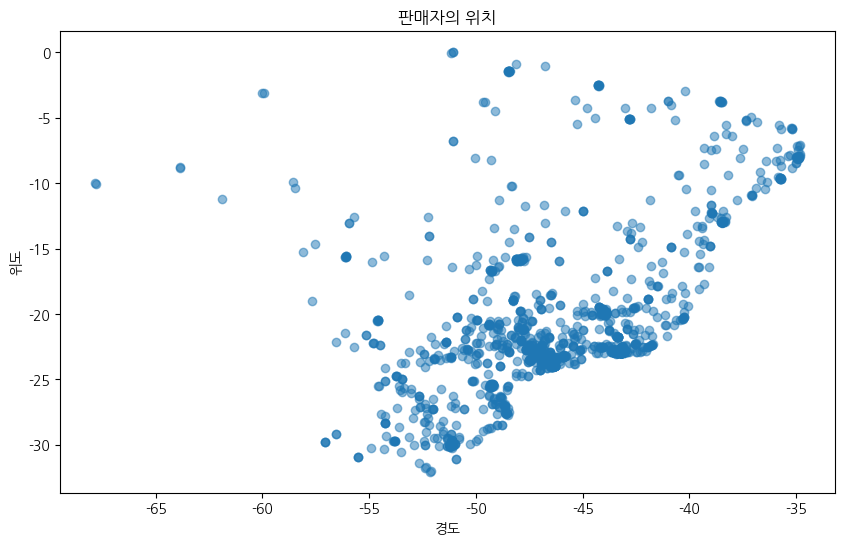

In [ ]:
plt.figure(figsize=(10, 6))
subset_geo = df.sample(2000)  # 데이터의 크기를 줄이기 위해 일부만 선택
plt.scatter(subset_geo['customer_geolocation_lng'], subset_geo['customer_geolocation_lat'], alpha=0.5)
plt.title('고객의 위치')
plt.xlabel('경도')
plt.ylabel('위도')
plt.show()

In [ ]:
import folium

# 데이터 중간 지점을 중심으로 지도 생성
m = folium.Map(location=[df['customer_geolocation_lat'].mean(), df['customer_geolocation_lng'].mean()], zoom_start=5)

# 데이터 샘플링 (데이터가 많으면 지도 로딩에 문제가 있을 수 있으므로)
sample_data = df.sample(n=1000)

# 지도 위에 데이터 포인트 표시
for idx, row in sample_data.iterrows():
    folium.CircleMarker(
        location=(row['customer_geolocation_lat'], row['customer_geolocation_lng']),
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m.save('map.html')  # HTML 파일로 저장

m  # Jupyter notebook 환경에서 지도 보기

#### 주문부터 배송까지 기간과 평점의 상관관계

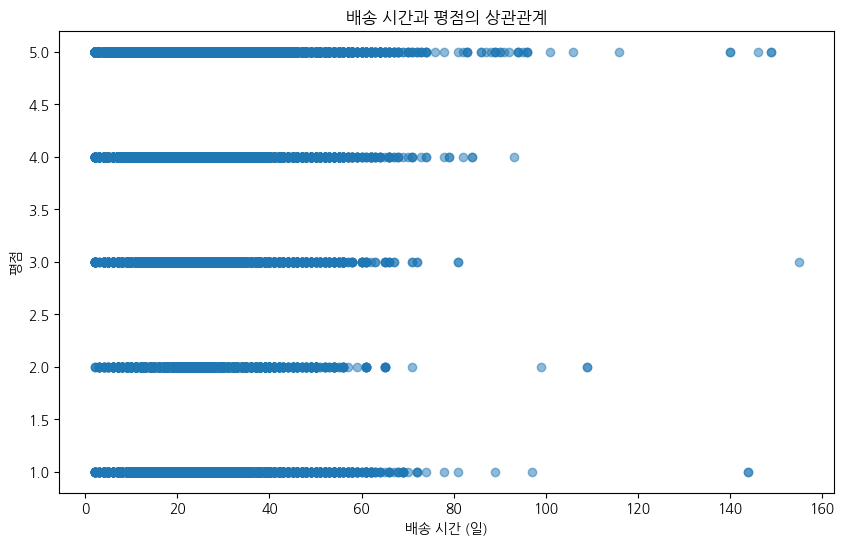

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['delivery_time'], df['review_score'], alpha=0.5)
plt.title('배송 시간과 평점의 상관관계')
plt.xlabel('배송 시간 (일)')
plt.ylabel('평점')
plt.show()

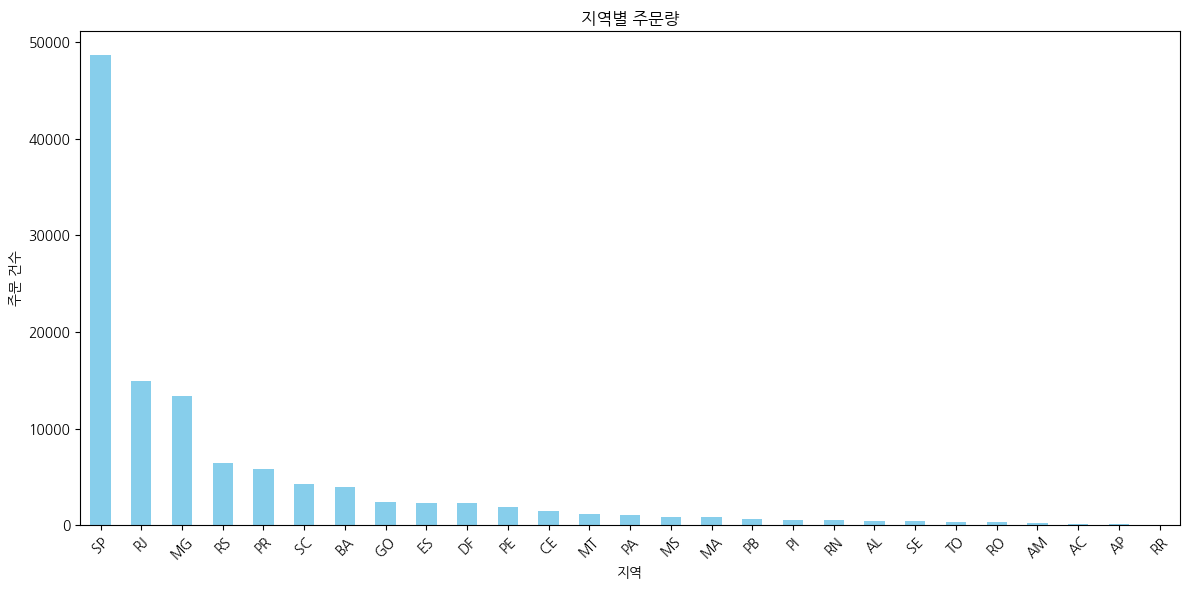

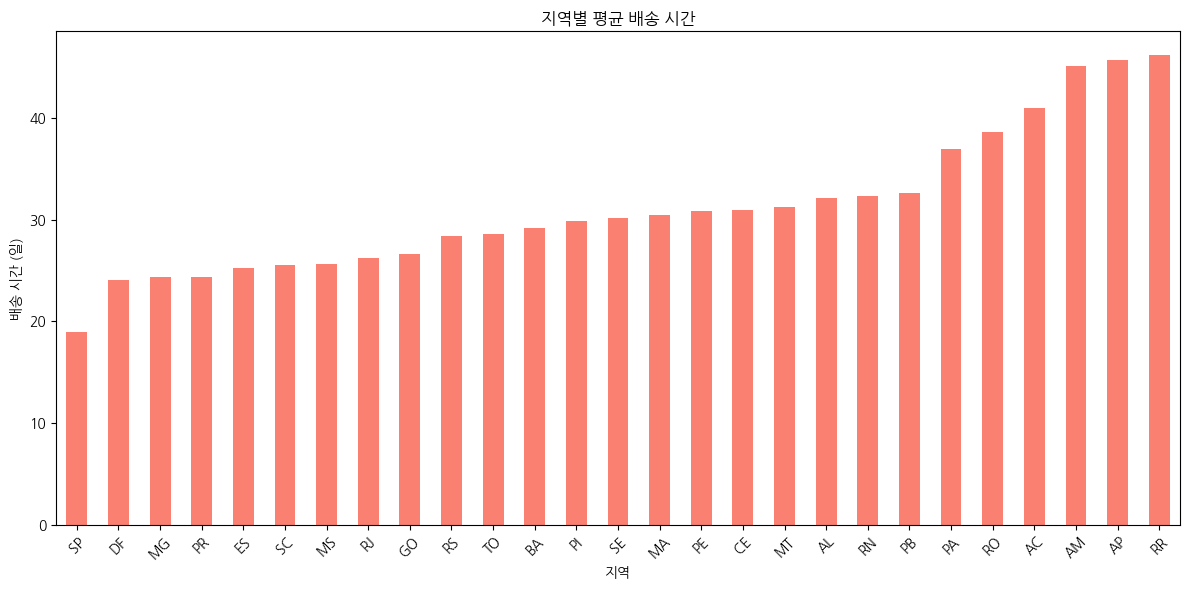

In [ ]:
# 지역별 주문량
plt.figure(figsize=(12, 6))
df['customer_state'].value_counts().plot(kind='bar', color='skyblue')
plt.title('지역별 주문량')
plt.ylabel('주문 건수')
plt.xlabel('지역')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 지역별 평균 배송 시간
plt.figure(figsize=(12, 6))
df.groupby('customer_state')['delivery_time'].mean().sort_values().plot(kind='bar', color='salmon')
plt.title('지역별 평균 배송 시간')
plt.ylabel('배송 시간 (일)')
plt.xlabel('지역')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

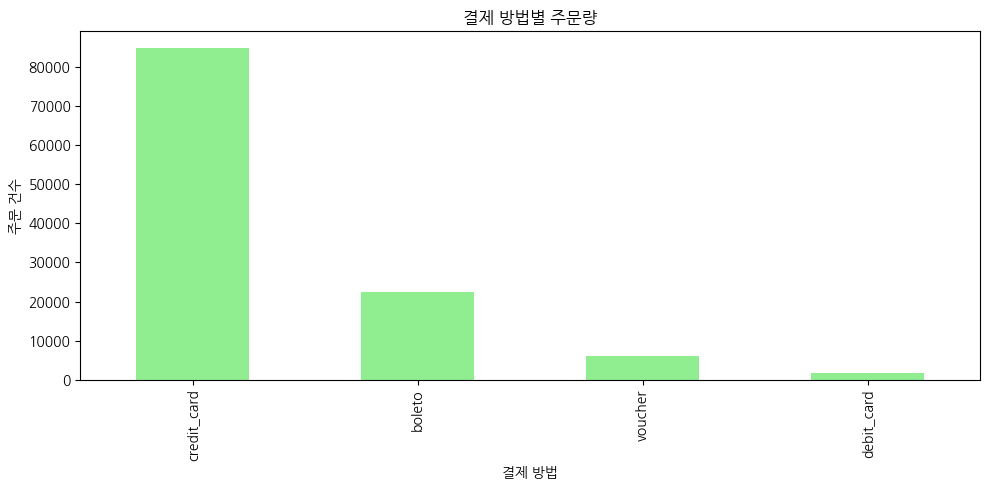

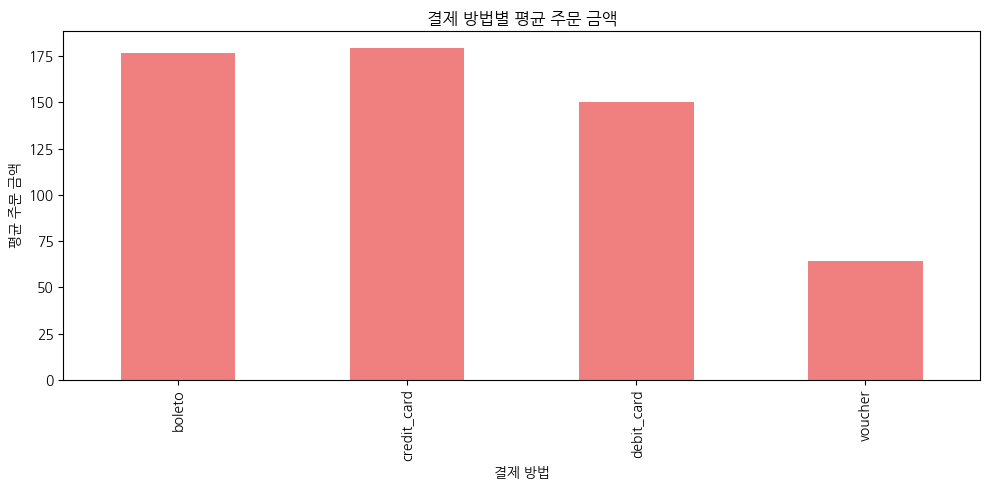

In [ ]:
# 결제 방법별 주문량
plt.figure(figsize=(10, 5))
df['payment_type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('결제 방법별 주문량')
plt.ylabel('주문 건수')
plt.xlabel('결제 방법')
plt.tight_layout()
plt.show()

# 결제 방법에 따른 평균 주문 금액
plt.figure(figsize=(10, 5))
df.groupby('payment_type')['payment_value'].mean().plot(kind='bar', color='lightcoral')
plt.title('결제 방법별 평균 주문 금액')
plt.ylabel('평균 주문 금액')
plt.xlabel('결제 방법')
plt.tight_layout()
plt.show()

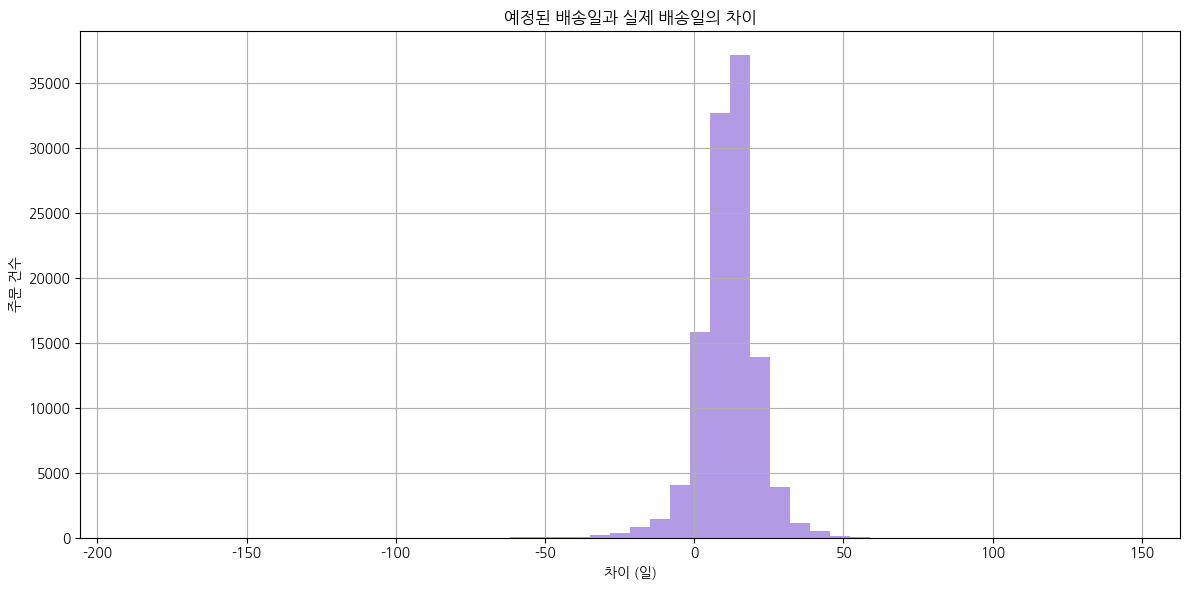

In [ ]:
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['delivery_diff'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days

plt.figure(figsize=(12, 6))
df['delivery_diff'].hist(bins=50, color='mediumpurple', alpha=0.7)
plt.title('예정된 배송일과 실제 배송일의 차이')
plt.xlabel('차이 (일)')
plt.ylabel('주문 건수')
plt.tight_layout()
plt.show()

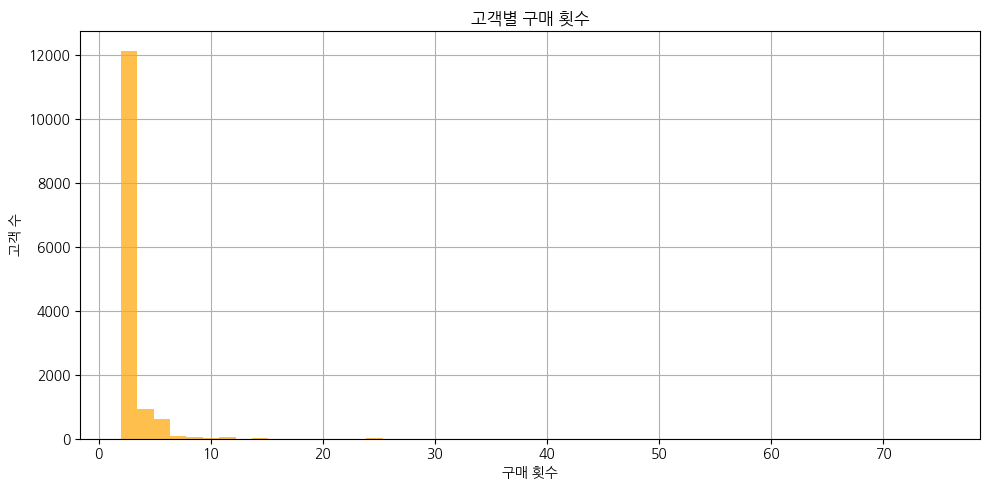

In [ ]:
repeat_customers = df['customer_unique_id'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]

plt.figure(figsize=(10, 5))
repeat_customers.hist(bins=50, color='orange', alpha=0.7)
plt.title('고객별 구매 횟수')
plt.xlabel('구매 횟수')
plt.ylabel('고객 수')
plt.tight_layout()
plt.show()

#### 고객별 주문 횟수
* 재구매한 사용자는 96,096명 중 2,997명에 불과하다.
* 2회 구매 초과한 사용자의 경우 그 비율은 계속해서 줄어든다.

In [ ]:
# 데이터베이스 연결 설정
config = {
  'user': 'root',
  'password': '00000000',
  'host': 'localhost',
  'database': 'zerobase',
  'raise_on_warnings': True
}

# 연결 생성
connection = mysql.connector.connect(**config)

# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''
SELECT customer_unique_id, COUNT(DISTINCT order_id) as order_count
FROM olist_customers_dataset
JOIN olist_orders_dataset ON olist_customers_dataset.customer_id = olist_orders_dataset.customer_id
GROUP BY customer_unique_id
HAVING order_count > 1
ORDER BY order_count DESC
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 결과를 데이터프레임으로 저장
df_customer_per_count = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_customer_per_count

,customer_unique_id,order_count
0,8d50f5eadf50201ccdcedfb9e2ac8455,17
1,3e43e6105506432c953e165fb2acf44c,9
2,1b6c7548a2a1f9037c1fd3ddfed95f33,7
3,6469f99c1f9dfae7733b25662e7f1782,7
4,ca77025e7201e3b30c44b472ff346268,7
...,...,...
2992,ff03923ad1eb9e32304deb7f9b2a45c9,2
2993,ff22e30958c13ffe219db7d711e8f564,2
2994,ff44401d0d8f5b9c54a47374eb48c1b8,2
2995,ff8892f7c26aa0446da53d01b18df463,2


In [ ]:
df_customer_per_count[df_customer_per_count.order_count > 3]

,customer_unique_id,order_count
0,8d50f5eadf50201ccdcedfb9e2ac8455,17
1,3e43e6105506432c953e165fb2acf44c,9
2,1b6c7548a2a1f9037c1fd3ddfed95f33,7
3,6469f99c1f9dfae7733b25662e7f1782,7
4,ca77025e7201e3b30c44b472ff346268,7
5,12f5d6e1cbf93dafd9dcc19095df0b3d,6
6,47c1a3033b8b77b3ab6e109eb4d5fdf3,6
7,63cfc61cee11cbe306bff5857d00bfe4,6
8,dc813062e0fc23409cd255f7f53c7074,6
9,de34b16117594161a6a89c50b289d35a,6


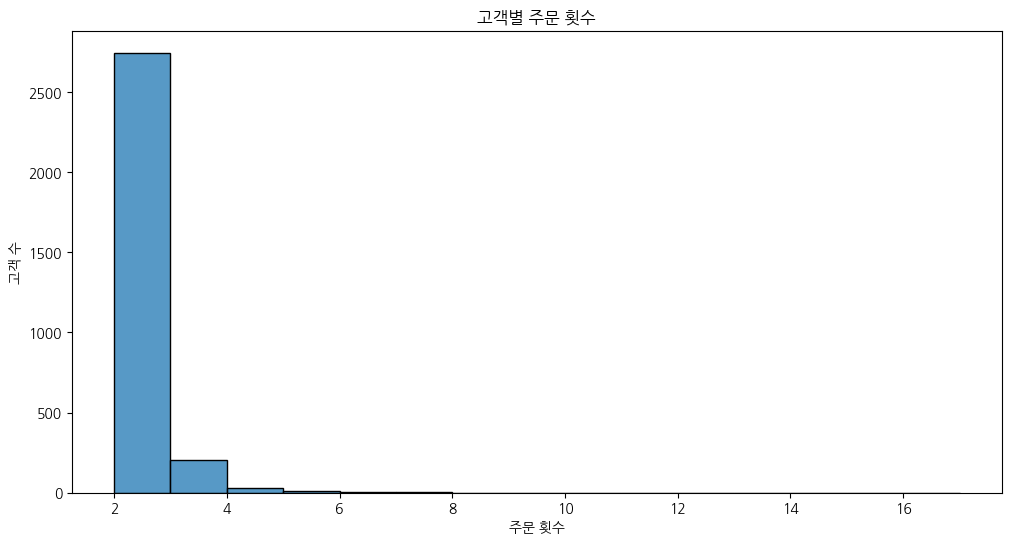

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_customer_per_count['order_count'], kde=False, bins=15)
plt.title('고객별 주문 횟수')
plt.xlabel('주문 횟수')
plt.ylabel('고객 수')
plt.show()

#### 상품 카테고리별 평균 가격

In [ ]:
# 연결 생성
connection = mysql.connector.connect(**config)

# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''
SELECT product_category_name_english, AVG(price) as avg_price
FROM olist_order_items_dataset
JOIN olist_products_dataset
ON olist_order_items_dataset.product_id = olist_products_dataset.product_id
JOIN product_category_name_translation
ON olist_products_dataset.product_category_name = product_category_name_translation.`﻿product_category_name`
GROUP BY product_category_name_english
ORDER BY avg_price DESC
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 결과를 데이터프레임으로 저장
df_category_per_price = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_category_per_price

,product_category_name_english,avg_price
0,computers,1098.340542
1,small_appliances_home_oven_and_coffee,624.285658
2,home_appliances_2,476.124958
3,agro_industry_and_commerce,342.124858
4,musical_instruments,281.616000
...,...,...
66,food_drink,54.602446
67,cds_dvds_musicals,52.142857
68,diapers_and_hygiene,40.194615
69,flowers,33.637576


<Figure size 1200x600 with 0 Axes>

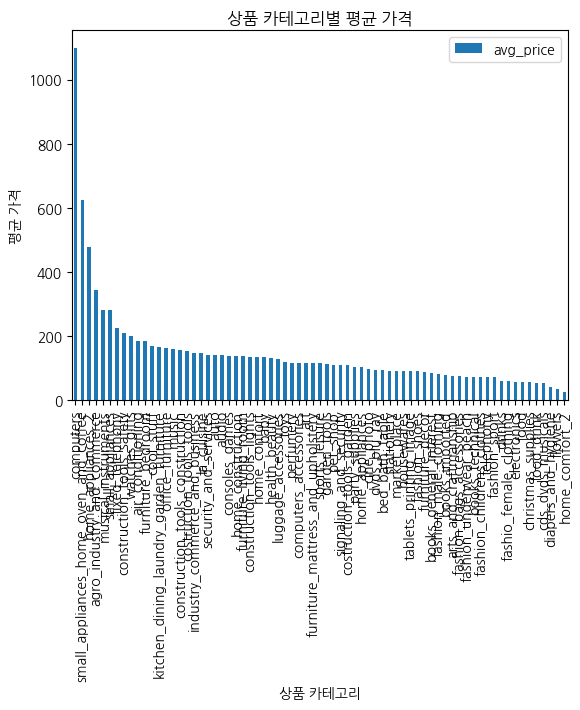

In [ ]:
plt.figure(figsize=(12, 6))
df_category_per_price.sort_values(by='avg_price', ascending=False).plot(kind='bar', x='product_category_name_english', y='avg_price')
plt.title('상품 카테고리별 평균 가격')
plt.xlabel('상품 카테고리')
plt.ylabel('평균 가격')
plt.xticks(rotation=90)
plt.show()

* 판매자별 판매된 상품 수

In [ ]:
# 연결 생성
connection = mysql.connector.connect(**config)

# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''
SELECT seller_id, COUNT(DISTINCT product_id) as product_count
FROM olist_order_items_dataset
GROUP BY seller_id
ORDER BY product_count DESC
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 결과를 데이터프레임으로 저장
df_sell_per_seller = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_sell_per_seller

,seller_id,product_count
0,4a3ca9315b744ce9f8e9374361493884,399
1,cca3071e3e9bb7d12640c9fbe2301306,322
2,d91fb3b7d041e83b64a00a3edfb37e4f,315
3,fa1c13f2614d7b5c4749cbc52fecda94,289
4,7142540dd4c91e2237acb7e911c4eba2,266
...,...,...
3090,fe9d9cf8631285d5982c6e2cf27fb114,1
3091,feb793c88d836c3a75efa4b5a3465d70,1
3092,fec6912baad85d41729669edd6b4d3b8,1
3093,fedaedd3ca31d56ab33e92035e4b361c,1


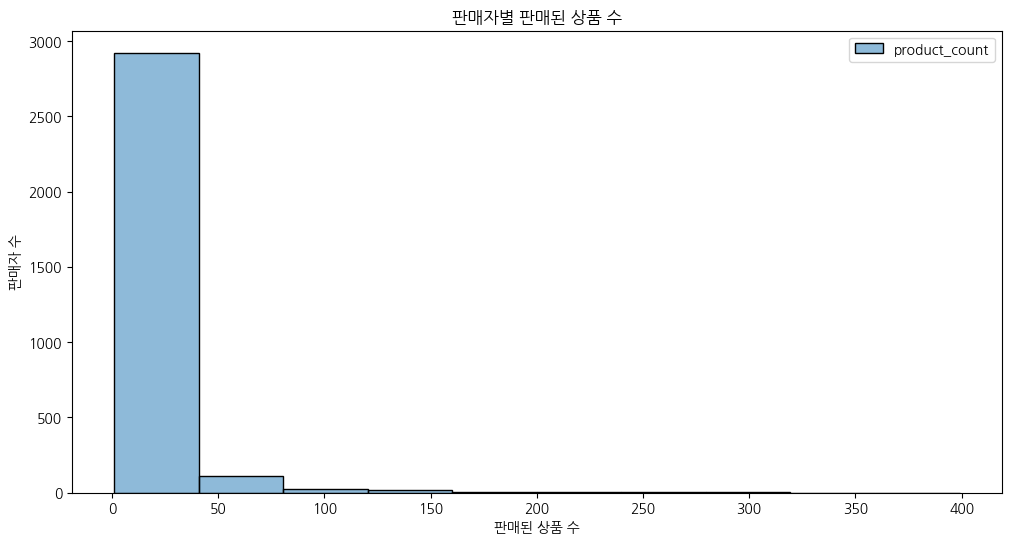

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_sell_per_seller, kde=False, bins=10)
plt.title('판매자별 판매된 상품 수')
plt.xlabel('판매된 상품 수')
plt.ylabel('판매자 수')
plt.show()

* 주문별 평균 배송 시간

In [ ]:
# 연결 생성
connection = mysql.connector.connect(**config)

# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''
SELECT order_id,
       TIMESTAMPDIFF(DAY, order_purchase_timestamp, order_delivered_customer_date) as delivery_duration
FROM olist_orders_dataset
WHERE order_status = 'delivered'
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 결과를 데이터프레임으로 저장
df_delivery_per_order = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_delivery_per_order

,order_id,delivery_duration
0,e481f51cbdc54678b7cc49136f2d6af7,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2.0
...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,8.0
96474,63943bddc261676b46f01ca7ac2f7bd8,22.0
96475,83c1379a015df1e13d02aae0204711ab,24.0
96476,11c177c8e97725db2631073c19f07b62,17.0


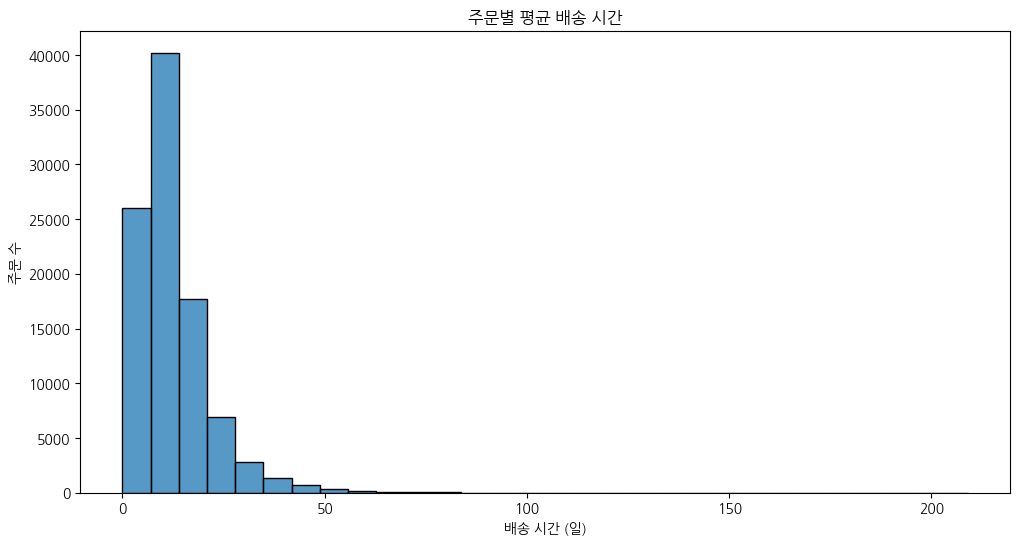

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_delivery_per_order['delivery_duration'], kde=False, bins=30)
plt.title('주문별 평균 배송 시간')
plt.xlabel('배송 시간 (일)')
plt.ylabel('주문 수')
plt.show()

* 주별 주문량의 변화

In [ ]:
# 연결 생성
connection = mysql.connector.connect(**config)

# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''
SELECT WEEK(order_purchase_timestamp) as week_num, COUNT(DISTINCT order_id) as order_count
FROM olist_orders_dataset
GROUP BY week_num
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 결과를 데이터프레임으로 저장
df_sell_amount_per_week = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_sell_amount_per_week

,week_num,order_count
0,0,1187
1,1,1786
2,2,1858
3,3,1814
4,4,1903
5,5,2040
6,6,2169
7,7,2156
8,8,2277
9,9,2130


<Figure size 1200x600 with 0 Axes>

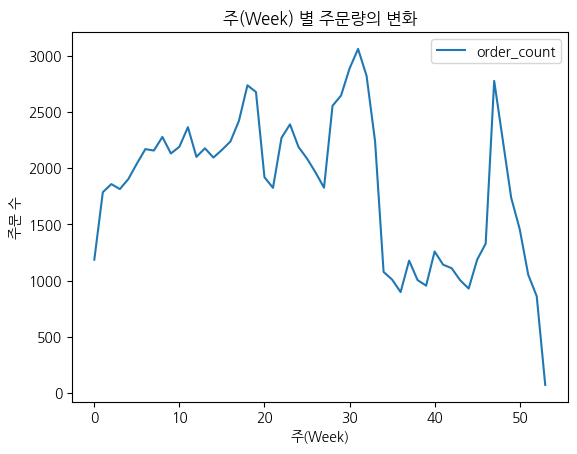

In [ ]:
plt.figure(figsize=(12, 6))
df_sell_amount_per_week.plot(kind='line', x='week_num', y='order_count')
plt.title('주(Week) 별 주문량의 변화')
plt.xlabel('주(Week)')
plt.ylabel('주문 수')
plt.show()

* 평점 4 이상의 상품별 주문 수

In [ ]:
# 연결 생성
connection = mysql.connector.connect(**config)

# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''
SELECT d.product_category_name_english, COUNT(DISTINCT a.order_id) as order_count
FROM olist_order_items_dataset a
JOIN olist_order_reviews_dataset b
ON a.order_id = b.order_id
JOIN olist_products_dataset c
ON a.product_id = c.product_id
JOIN product_category_name_translation d
ON c.product_category_name = d.`﻿product_category_name`
WHERE review_score >= 4
GROUP BY d.product_category_name_english
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 결과를 데이터프레임으로 저장
df_over_4_category_order_amount = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_over_4_category_order_amount

,product_category_name_english,order_count
0,agro_industry_and_commerce,111
1,air_conditioning,158
2,art,116
3,arts_and_craftmanship,14
4,audio,187
...,...,...
66,stationery,1488
67,tablets_printing_image,42
68,telephony,2450
69,toys,2418


<Figure size 1200x600 with 0 Axes>

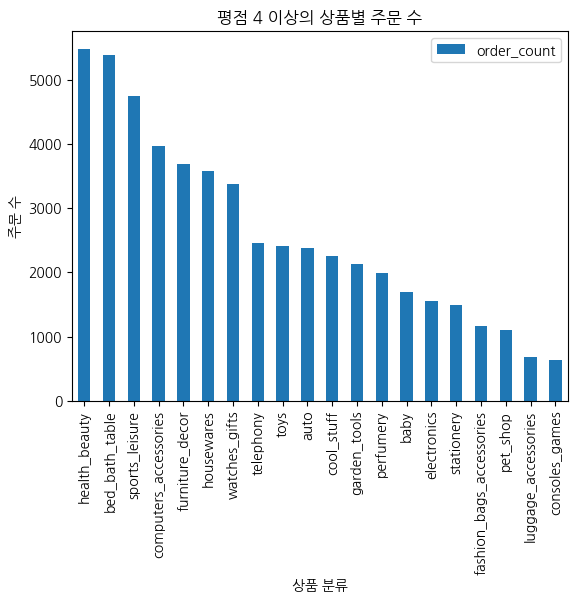

In [ ]:
plt.figure(figsize=(12, 6))
df_over_4_category_order_amount.sort_values(by='order_count', ascending=False).head(20).plot(kind='bar', x='product_category_name_english', y='order_count')
plt.title('평점 4 이상의 상품별 주문 수')
plt.xlabel('상품 분류')
plt.ylabel('주문 수')
plt.xticks(rotation=90)
plt.show()

* 각 도시별 고객 수

In [ ]:
# 연결 생성
connection = mysql.connector.connect(**config)

# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''
SELECT customer_city, COUNT(DISTINCT customer_unique_id) as unique_customers
FROM olist_customers_dataset
GROUP BY customer_city
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 결과를 데이터프레임으로 저장
df_people_per_city = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_people_per_city

,customer_city,unique_customers
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2
...,...,...
4114,xinguara,9
4115,xique-xique,3
4116,zacarias,2
4117,ze doca,5


<Figure size 1200x600 with 0 Axes>

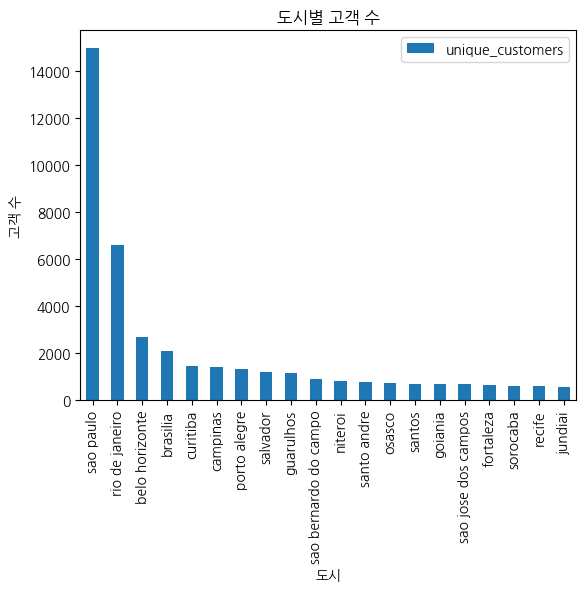

In [ ]:
plt.figure(figsize=(12, 6))
df_people_per_city.sort_values(by='unique_customers', ascending=False).head(20).plot(kind='bar', x='customer_city', y='unique_customers')
plt.title('도시별 고객 수')
plt.xlabel('도시')
plt.ylabel('고객 수')
plt.xticks(rotation=90)
plt.show()

# 3. 가설 검증

### 가설 1 : 주문 금액이 높을수록 리뷰 점수도 높을 것이다.

Correlation: -0.08233519237715801
P-value: 3.4709739273608703e-172


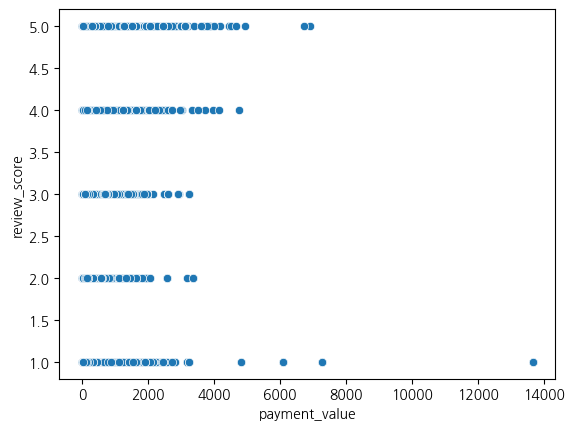

In [ ]:
import seaborn as sns
import scipy.stats as stats

# 상관계수 확인
correlation, p_value = stats.pearsonr(df['payment_value'], df['review_score'])

print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

sns.scatterplot(data=df, x='payment_value', y='review_score')
plt.show()

- 귀무가설 (H0): 모든 리뷰 점수의 지불 금액 평균은 같다.
- 대립가설 (H1): 적어도 두 개 이상의 리뷰 점수에서 지불 금액의 평균에 차이가 있다.

- 결과: 만약 ANOVA 분석에서 F값이 크고 p-value가 0.05보다 작다면, 리뷰 점수에 따라 지불 금액에 통계적으로 유의한 차이가 있다고 할 수 있다. 이것은 고객들이 높은 리뷰 점수를 받은 제품에 더 많은 돈을 지불할 준비가 있다는 것으로 의미할 수 있다.

### 가설2 : 배송 시간이 짧을수록 리뷰 점수가 높을 것이다.

Correlation: -0.06288459595366275
P-value: 3.938501842573324e-101


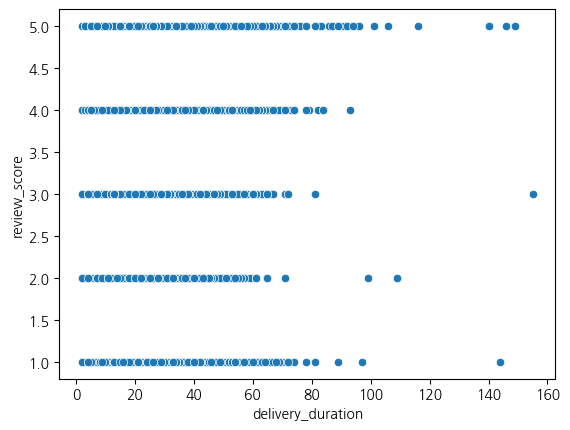

In [ ]:
df_delivery = df.copy()
df_delivery['delivery_duration'] = pd.to_datetime(df_delivery['order_estimated_delivery_date']) - pd.to_datetime(df_delivery['order_purchase_timestamp'])
df_delivery['delivery_duration'] = df_delivery['delivery_duration'].dt.days

correlation, p_value = stats.pearsonr(df_delivery['delivery_duration'], df_delivery['review_score'])

print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

sns.scatterplot(data=df_delivery, x='delivery_duration', y='review_score')
plt.show()

- 귀무가설 (H0): 배송 시간과 리뷰 점수 사이에는 상관관계가 없다.
- 대립가설 (H1): 배송 시간이 짧을수록 리뷰 점수가 높다.

- 결과: ANOVA 분석에서 F값이 크고 p-value가 0.05보다 작다면, 배송 시간과 리뷰 점수 사이에는 통계적으로 유의한 상관관계가 있다. 즉, 배송 시간이 짧을수록 리뷰 점수가 높아지는 경향이 있다고 볼 수 있다.

### 가설 3 : 각 지역별 평균 주문 금액은 다를 것이다.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('payment_value ~ customer_state', data=df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)

print(anova_result)

                      sum_sq        df          F         PR(>F)
customer_state  5.450727e+07      26.0  29.775957  6.396970e-146
Residual        8.097500e+09  115010.0        NaN            NaN


- 귀무가설 (H0): 모든 주의 지불 금액의 평균은 같다.
- 대립가설 (Ha): 적어도 두 개 이상의 주에서 지불 금액의 평균에 차이가 있다.

* sum_sq: 그룹 간 및 그룹 내 변동의 제곱합. customer_state의 변동성과 잔차(Residual)의 변동성이 여기에 나타나 있다.

* df: 자유도. customer_state의 경우 26인데, 이는 데이터에 있는 주의 수에서 1을 뺀 값.

* F: F 통계량. 큰 F 값은 그룹 간 평균의 차이가 그룹 내 변동성보다 훨씬 크다는 것을 나타낸다. 여기서 F 값은 29.78로, 이 값이 크다는 것은 주에 따른 지불 금액의 차이가 통계적으로 유의하다는 것을 암시한다.

* PR(>F): p-value. 통계적 유의성을 나타내는 값으로, 귀무가설을 기각하는 기준이 된다. 여기서 p-value는 매우 작은 값(6.396970e-146)으로, 이는 0.05보다 훨씬 작다. 따라서 귀무가설을 기각하고 대립가설을 채택한다.

* 결론: 주(customer_state)에 따라 지불 금액(payment_value)에 통계적으로 유의한 차이가 있다는 것을 ANOVA 분석을 통해 확인할 수 있다.

### 가설 4

1. 고객의 지역(customer_zip_code_prefix), 위치 데이터(geolocation_lat, geolocation_lng), 판매자의 지역(seller_zip_code_prefix) 등은 배송비에 영향을 미치므로 payment_value에 영향을 미칠 것이다.
<br>

2. order_item_id, price, freight_value는 직접적으로 payment_value를 구성하는 요소이므로 큰 영향을 미칠 것이다.
<br>

3. 제품 정보(product_name_lenght, product_description_lenght, product_photos_qty 등)는 구매 결정에 영향을 미칠 수 있으므로 payment_value에 영향을 미칠 것이다.
<br>

4. review_score는 고객 만족도를 나타내므로 높은 가격의 제품을 구매하는 경우 높을 수 있다.

* 통계적 추론:Multiple Linear Regression 모델을 사용하여 각 feature의 payment_value에 대한 영향력을 확인

In [ ]:
import statsmodels.api as sm

# 독립변수와 종속변수 설정
X = df[['payment_sequential', 'payment_installments', 'customer_zip_code_prefix', 'customer_geolocation_lat',
        'customer_geolocation_lng', 'seller_zip_code_prefix', 'order_item_id', 'price', 'freight_value',
        'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm',
        'product_height_cm', 'product_width_cm', 'review_score']]
y = df['payment_value']

# 상수항 추가
X = sm.add_constant(X)

# 모델 학습
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          payment_value   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                 1.271e+04
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:40:06   Log-Likelihood:            -7.4482e+05
No. Observations:              115037   AIC:                         1.490e+06
Df Residuals:                  115019   BIC:                         1.490e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

1. 결정계수(R-squared) : 0.653

> * 결정계수는 반응 변수의 변동 중 설명 변수로 설명되는 부분의 비율을 나타냅니다. 이 모델은 전체 변동의 약 65.3%를 설명합니다. 이는 이 변수들이 payment_value의 변동성을 상당히 잘 설명한다고 볼 수 있습니다.

2. P-value

> * 각 독립 변수의 P-value는 해당 변수의 계수가 통계적으로 유의미한지를 확인하는 데 사용됩니다. 일반적으로 P-value가 0.05보다 작으면 해당 변수는 종속 변수를 예측하는 데 중요하다고 판단됩니다.

3. 계수(coef)

> * 각 독립 변수의 계수는 해당 변수의 한 단위 변화가 종속 변수에 미치는 평균적인 영향을 나타냅니다.

4. 결론 및 해석

> * order_item_id, price, freight_value 등의 변수는 유의미한 P-value 값을 갖습니다. 즉, 이들 변수는 payment_value 예측에 큰 영향을 미친다고 볼 수 있습니다.
> * customer_geolocation_lat, customer_geolocation_lng, seller_zip_code_prefix 등은 P-value가 0.05 이상으로, 이들 변수의 계수는 통계적으로 유의미하다고 보기 어렵습니다.
> * 예를 들어, order_item_id의 경우 한 단위 증가할 때 payment_value는 약 114.01 단위만큼 증가하며, 이는 매우 유의미한 영향을 미친다고 할 수 있습니다.
> * 반면, product_name_lenght는 negative coefficient를 갖기 때문에 해당 값이 증가할 때 payment_value는 감소하는 경향이 있습니다.
> * review_score는 -7.0060의 계수 값을 갖기 때문에, 리뷰 점수가 한 단위 상승하면 payment_value는 약 7.0060 단위만큼 감소한다고 해석할 수 있습니다. 이는 인사이트를 제공할 수 있는 부분으로, 더 나은 제품 평가가 더 낮은 가격에 연결될 수 있다는 가능성을 나타냅니다.

5. 가설 검증

> * 대부분의 변수들이 payment_value에 영향을 미칩니다. 특히, order_item_id, price, freight_value와 같은 변수들은 매우 유의미한 영향을 미칩니다.
> * 그러나, 모든 변수가 유의미한 영향을 미치는 것은 아닙니다. 일부 변수들은 통계적으로 유의미한 영향을 미치지 않습니다.

6. 추천

> * customer_geolocation_lat, customer_geolocation_lng, seller_zip_code_prefix와 같은 유의미하지 않은 변수는 모델에서 제거하는 것을 고려할 수 있습니다.
> * 다른 추가적인 변수나 상호작용 항을 포함하여 모델의 성능을 향상시킬 방법을 모색할 수 있습니다.

7. OLS 사용 이유
- statsmodels의 OLS (Ordinary Least Squares)는 선형 회귀 분석을 수행하기 위한 방법 중 하나입니다. OLS는 종속 변수와 하나 이상의 독립 변수 사이의 관계를 모델링하는 데 사용되며, 주로 추정된 회귀 계수가 통계적으로 유의한지, 각 독립 변수가 종속 변수에 어느 정도 영향을 미치는지, 전체 모델의 적합도 등을 평가하기 위해 사용됩니다.
<br>

- 가설 검증에 OLS를 사용하는 이유는 여러 가지가 있습니다:
<br>

> - 해석 용이성: OLS 결과는 통계적 가설 검정, 계수 추정, 신뢰 구간 등의 통계적 정보를 제공하므로 모델의 특성과 데이터에 대한 통찰력을 얻기 쉽습니다.
<br>

> - 통계적 속성: OLS는 선형 회귀 가정이 만족되는 경우 최소 분산 무편추정량(BLUE: Best Linear Unbiased Estimator)입니다.
<br>

> - 귀무 가설 검정: OLS를 통해 각 변수의 계수에 대한 유의성을 검증할 수 있습니다.
<br>

- 그러나 다른 여러 회귀 모델이 있고, 각 모델은 특정 상황과 데이터에 더 적합할 수 있습니다:
<br>

> - Ridge, Lasso, ElasticNet: 다중 공선성 문제를 해결하거나 특징 선택을 위해 사용됩니다.
<br>

> - 로지스틱 회귀: 종속 변수가 이진 변수인 경우 사용됩니다.
<br>

> - 일반화 선형 모델 (GLM): 오차 분포가 정규 분포를 따르지 않는 경우나 링크 함수를 사용하여 선형 조합을 종속 변수에 연결할 때 사용됩니다.
<br>

> - 비선형 회귀, 다항 회귀: 독립 변수와 종속 변수 간의 관계가 비선형일 때 사용됩니다.
<br>

- OLS는 기본적인 선형 회귀 분석에 사용되며, 데이터와 문제에 따라 다른 모델을 사용할 수 있습니다. 따라서 가설을 검증하려는 주제와 데이터의 특성에 따라 적절한 모델을 선택하는 것이 중요합니다.